In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# LOADING DATASET

In [2]:
df = pd.read_excel('employeeDS.xlsx')

In [3]:
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


In [4]:
df['Date of Joining']=pd.to_datetime(df["Date of Joining"])

In [5]:
df.shape

(22750, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [7]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [8]:
df.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [9]:
df.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [10]:
df.duplicated().sum()

0

df.describe()

In [11]:
for i, col in enumerate(df.columns):
    print(f"\n\n{df[col].unique()}")
    print(f"\n{df[col].value_counts()}\n\n")




['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: Employee ID, Length: 22750, dtype: int64




['2008-09-30T00:00:00.000000000' '2008-11-30T00:00:00.000000000'
 '2008-03-10T00:00:00.000000000' '2008-11-03T00:00:00.000000000'
 '2008-07-24T00:00:00.000000000' '2008-11-26T00:00:00.000000000'
 '2008-01-02T00:00:00.000000000' '2008-10-31T00:00:00.000000000'
 '2008-12-27T00:00:00.000000000' '2008-03-09T00:00:00.000000000'
 '2008-03-16T00:00:00.000000000' '2008-05-12T00:00:00.000000000'
 '2008-01-20T00:00:00.000000000' '2008-02-23T00:00:00.000000000'
 '2008-

In [12]:
df=df.drop(['Employee ID'],axis=1)

In [13]:
# check the skewness of the attributes
intFloatdf=df.select_dtypes([np.int, np.float])
for i, col in enumerate(intFloatdf.columns):
    if (intFloatdf[col].skew() >= 0.1):
        print("\n",col, "feature is Positively Skewed and value is: ", intFloatdf[col].skew())
    elif (intFloatdf[col].skew() <=-0.1):
        print("In",col, "feature is Negtively Skewed and value is: ", intFloatdf[col].skew())
    else:
        print("In",col, "feature is Hormally Distributed and value is: ", intFloatdf[col].skew())

In Designation feature is Hormally Distributed and value is:  0.09242138478903683

 Resource Allocation feature is Positively Skewed and value is:  0.20457273454318103
In Mental Fatigue Score feature is Negtively Skewed and value is:  -0.4308950578815428
In Burn Rate feature is Hormally Distributed and value is:  0.045737370909640515


In [14]:
 # Replace the null values with mean
df['Resource Allocation'].fillna(df['Resource Allocation'].mean(),inplace=True)
df['Mental Fatigue Score'].fillna(df['Mental Fatigue Score'].mean(),inplace=True)
df['Burn Rate'].fillna(df['Burn Rate'].mean(),inplace=True)

In [15]:
# check for null values
df.isna().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [16]:
#show the corelation
df.corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.852046,0.656445,0.719284
Resource Allocation,0.852046,1.000000,0.739268,0.811062
Mental Fatigue Score,0.656445,0.739268,1.000000,0.878217
Burn Rate,0.719284,0.811062,0.878217,1.000000


# Data Visualization

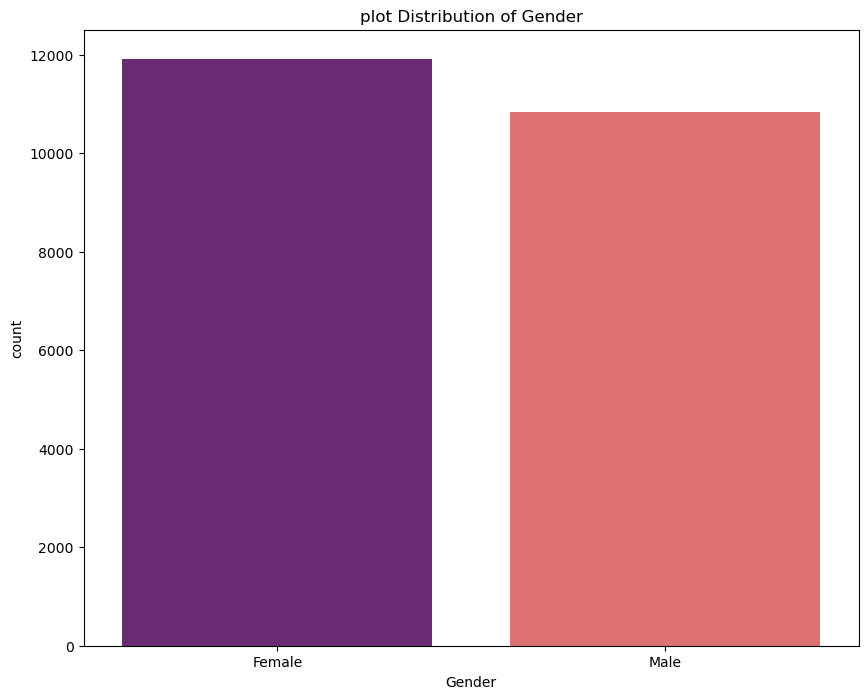

In [20]:
#Count plot distribution of "Gender"
plt.figure(figsize=(10,8))
sns.countplot (x="Gender", data=df, palette="magma")
plt.title("plot Distribution of Gender")
plt.show()

# Count plot distribution of "Company Type"
plt.figure(figsize=(10,8))
sns.countplot(x="Company Type", data=df, palette="Spectral")
plt.title("Plot Distribution of Company Type")
plt.show()

In [ ]:
# Count plot distribution of "WFH Setup Available"
plt.figure(figsize=(10,8))
sns.countplot(x="WFH Setup Avadata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA2cAAALACAYAAAAXJQqHAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAABWIElEQVR4nO3dfXzN9eP/8ec5O2Zjho2ZhORizMVGxoimleqTSvh8vlRzfVXEJ8pSIYpUCCOKzUVRGyZdqT74EMIu0MU3k0hLMZOLLWObXfz+8Nv5Om1sZrPXeNxvN7fa+/0+r/M6Z2c7e+x9MUtubm6uAAAAAABlylrWEwAAAAAAEGcAAAAAYATiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAOAUpKbm1vWU5BU9vMo6/tH6eDzCgAljzgDcFPq27evfHx8HP61aNFCXbp00ZQpU5SSkuKwbd++fa9q/N27d2v48OFX3Gbt2rX55tCyZUsFBwdr4sSJOn78uMP28+bNk4+PT5HnkJSUpOHDh+uPP/644nYxMTHy8fFRTExMse7nSjZt2qTnn3/+svdlgpiYGN1///1q0aKFBg8enG/96NGjFRAQkC9GEhIS5OPjIz8/P2VkZDisO3DggHx8fPThhx9KkoKDg/N9ri/9l5SUJKnw11pwcLDGjx9/1Y/x3Llzmjdvnh588EG1atVKd9xxh/r06aNVq1YpJyfnqsdbuHChIiIirvp218PcuXPl4+Ojl19+udTuoyS+ZopyGxO/XgCULltZTwAAyoqvr6/DD3AXLlzQjz/+qLfeeksJCQn68MMPZbFYijX26tWrdfDgwSJtO3/+fNWsWVOSdP78ef38889699139d///leRkZGqW7euJOlf//qXOnfuXOQ57NixQ1u2bNHEiROvuF3z5s0VFRWlRo0aFXnsolq2bNl1u6/ieuONN5STk6NFixbJ09Mz3/qOHTvqq6++0sGDB9W4cWP78m3btqlatWo6c+aMYmNjHT43cXFxkqROnTrZlwUFBWnEiBEFzsHDw6OkHk4+ubm5evLJJ3Xo0CENHTpUPj4+ysjI0Pbt2zVp0iT9/PPPeumll65qzDlz5ujpp58upRkXX05OjtatW6cmTZro008/VWhoqCpXrlzi92Pi6xjAjYE4A3DTcnNzk7+/v8OygIAApaWlKSwsTN99912+9aWhWbNmuvXWW+0fd+jQQXfffbd69uypSZMmaenSpZIkb29veXt7l/j9F/Q8lJbreV9FdebMGQUEBKhjx44Frs9bvmfPnnxxdt9992nnzp3atm2bQ5zFx8erXr169rCWLgZYWTz23bt3KyYmRhEREQ6x2KVLF1mtVq1YsULDhg2z/4KgPNuxY4eOHj2qlStXql+/fvr000/Vp0+fEr8fE1/HAG4MHNYIAH/TokULSdLRo0cLXJ+RkaG3335bDzzwgFq2bKn77rtPixYtsh8eNn78eH300Uf6448/5OPjo7Vr1171HOrWrav/+Z//0Y4dO/Tbb79Jyn8Y1JEjR/TUU0+pffv28vPzU+/evfX1119LunjI5AsvvCBJuueee+yHwgUHB+u1115T//791aZNG02aNOmyh05t3LhR999/v1q2bKl//etf2rlzp33d5W5z6WF5ffv2VWxsrGJjY+3bFnS7H374QYMHD1b79u3Vpk0bPfnkk/r555/z3dfOnTs1aNAg+fn5qWPHjnrjjTeUlZV1xefx119/1ejRo3XnnXfK399fffv21e7duyVJv//+u3x8fPTHH39o3bp1lz18rF69eqpTp4727NljX5aWlqa9e/eqQ4cOuvPOO7V9+3aH28THx+vOO++84tyulxMnTkgq+Byxxx9/XGPGjHHYQ3z06FGNHTtW7dq1k5+fn/r37699+/bZ1+e9BufPn2///8sdoufj46N58+ZJ+r/n+/PPP9eTTz4pPz8/BQUFad68ecU6tLIg0dHRuv3229W2bVt16NBBkZGRDusnTpyowMDAfK+bGTNmqF27dsrMzJR08bX/+OOPq3Xr1mrRooUeeOABrVixwr59YYcbZmdna9GiRXrooYfUqlUr+fv7q0+fPg5fQ3mu9HVWkAMHDmj48OFq06aN2rRpo5EjR+rIkSNFen4AmI84A4C/OXz4sCQ57PXIk3eIWHh4uP75z3/qnXfe0QMPPKA5c+bYD5EcMWKEgoKCVLNmTUVFRalLly7FmkfeXo68mLhUTk6Ohg8frnPnzunNN9/UggULVK1aNY0YMUKJiYnq0qWLnnrqKUkXf4i+9HC6lStX2n9o7t69+2Xv/8UXX1S/fv00b948Va5cWUOHDi3yoZqS9PLLL8vX11e+vr6KiopS8+bN822za9cuPfbYY8rJydG0adM0depUHTt2TH369NGhQ4cctn3uued0xx136J133tHDDz+sJUuWaM2aNZe9/4MHD6pnz546cuSIJkyYoJkzZ8pisah///6KjY2Vl5eXoqKiVLNmTQUFBV12jtLFvZmXxtmuXbuUnZ2tjh07qlOnTjp06JA95hMTE5WcnOywl0q6+NrJysrK9+/vLrddYSF6Oe3atVOlSpU0duxYzZgxQzExMUpPT5ck3XbbbRo6dKhq1KghSTp16pT69OmjH3/8URMnTtSsWbOUk5OjJ554wv75iIqKkiT985//tP//1Zg8ebLc3Nw0b948Pfroo1qwYIHefPPNYj22S6WkpGjjxo3q0aOHJKlnz55KSEjQd999Z9+me/+j06dP697//rXPnzjlsezVfZ4cPH1afPn108uRJvf7665o2bZqOHDmixx57TCdPnrzapwyAgTisEcBNK++H4DwpKSmKjY3VwoUL5e/vb9+DdqmtW7dqx44dmjFjhh555BFJ0p133ikXFxfNnTtX/fv3V6NGjeTh4SFnZ+drOvQp7zCzvD0flzp58qQOHTqkJ598UkFBQZKkVq1aaf78+crIyFD9+vVVr149SfkPm/Ty8tL48eNltV78/dzlfvv/8ssvq1u3bpIuxsk999yjhQsXatasWUWaf6NGjeTm5iZJl30eZs2apbp16yo8PFxOTk6SLkZp165dNW/ePM2ZM8e+7b/+9S+NHDnSPp+NGzdqy5Ytlz1sbf78+apQoYLee+89ValSRdLFQ/keeughzZgxQ6tXr5a/v7+cnZ0LPeSwY8eOWrNmjU6cOKGaNWtq27ZtatmypapVq6YOHTrIZrNp27Zt6t27t+Li4mSz2RQYGOgwxrp167Ru3bp8Y69cuVJt27a1fxwXF3fZSCwOT09PLV68WOPHj1d4eLjCw8NVoUIF+fv766GHHtI///lP2WwXfxxYvny5zpw5ow8//FB16tSRJN1111168MEHNXfuXIWFhdmfJ29v72K9vn19fTVz5kz72OfOndOKFSs0YsQIubu7F/txfvrpp8rOzrb/wqFr166qWrWqIiMj5efnJ0m64447dOutt2r9+vX2w1B3796to0eP2m938OBBPfroow7n4bVu3Vrt27dXXFyc2rRpU+hckpOTNWbMGIeLu7i4uGjUqFH66aef1Lp1a/vyq/k6mz9/vlxcXLRs2TL711aHDh107733Kjw83OHiOwDKJ+IMwE2roB+CrVarOnTooFdffbXAi4HExsbKyclJDz74oMPyRx55RHPnzlVMTEyJXySgoHnUqFFDjRo10sSJE7Vjxw7ddddd6tSpk/1Qxitp2LChPcwux8nJSffdd5/944oVK+quu+7S5s2br/4BXMa5c+f0ww8/aOTIkfYwkyR3d3fdfffd9kM081z6A610MQ7+vhfiUrGxsbr77rvtYSZJNptN3bp109tvv620tLQiXywiMDBQFotFe/fu1X333aft27fb49zNzU2tWrXSjh077HHWqlUr+w/Pee6++257XF7q9ttvd/i4efPmmjJlSoHzyNsberXatm2r//znP9q9e7e2b9+u2NhYffvtt4qLi9PHH3+spUuXysXFRTt37lSzZs1Uq1Yt+y8urFar7rrrLn3yySfFuu+/y3ve8tx///1677339O233+quu+4q9rjR0dEKCAiQq6urUlNTJUn33nuvPv/8c73wwgtyd3eXxWLRI488ovfff19TpkyRs7OzPvvsM9WtW1d33HGHJGnIkCGSLr4+f/vtNx0+fFg//PCDpIsXDSqKvLA6deqUEhMTdfjwYf33v//NN8bVfp3t2rVL7du3l4uLi/3z4+bmprZt22rHjh1Ffq4AmIs4A3DTuvSHYIvFoooVK6p27dr5fqi+VEpKiqpXr27f05Anby/XX3/9VWLzy7uUfkEXAbFYLFqyZIkWLlyoDRs26KOPPlKFChV07733avLkyapWrdplx807hO1KqlWrpgoVKjgs8/T0tP/QWxL++usv5ebmFjifGjVq5HsuXVxcHD62Wq1X/FtbKSkplx07NzdXZ8+eLXKceXp6qkmTJtqzZ4+aNGmiI0eOOBy22KlTJ61YsUK5ubmKj4+3H1p3qWrVqqlly5aF3lflypUvu52zs3OR5lsQq9WqgIAABQQESLr4/MyZM0cffPCB1qxZo5CQEJ05c0aJiYmX3XN3/vx5ubq6FnsO0sU9t5fKu1Lltby29u/fbz8vLu/xXeqjjz5S//79Jcl+KOXWrVvVpUsXffnll3r88cft2546dUovv/yyNm7cKIvFovr169vDrah/2+2HH37QlClT9MMPP8jFxUWNGjWy74m8dIyr/To7c+aM1q9fr/Xr1+dbV5pX/ARw/RBnAG5aV/oh+HKqVq2q06dPKysryyHQkpOTJUnVq1cvsfnt2LFDFovF4ZC3S9WqVUuTJ0/Wyy+/rP379+vLL7/U4sWLVbVq1cvueSmqvHC6dK/dn3/+af8BMG/53y/kcDV7o6pUqSKLxaI///wz37oTJ05cMTCLomrVqpcdW7r6z1XHjh313XffqW7duqpSpYr9UDnpYpyFhYVp165d+v333/Odb1aWnnnmGZ05cybfnzWoWrWqJk6cqM8//9x+jlOVKlXUrl07hYaGFjjW5eIw7/WQnZ1t3wualpZW4LZnzpxx+DjvXKmC/oxBUa1Zs0aurq5auHBhvr3CU6ZMUVRUlD3O6tevL39/f33xxReqUKGCTp8+7bA377nnntOhQ4e0dOlStWnTRs7Ozjp//rxWr15dpLmcPXtWQ4YMkY+Pjz777DP7nuqvv/5aX331lcO2hX2d/V2VKlXUsWNHDRw4MN+6v//CCED5xAVBAOAqtGvXTtnZ2fl+c513yFfeb9gLO2ywMElJSVq9erW6dOmi2rVr51u/d+9edezYUd9//70sFouaNWumMWPGqEmTJvY/aHwtc8jMzNSuXbvsH6elpWnLli1q3769JNn3Lh47dsy+TUpKSr6LeFxpDpUqVVKLFi20fv16ZWdn25f/9ddf2rJli/25LK6AgABt3rzZYQ9cdna2Pv/8c7Vs2fKq90J16NBBCQkJ2rVrlzp27OhwKGbe+WeRkZFyd3e/6ugvTfXr19euXbv07bff5luXnJysc+fOqUmTJpIuvr4PHz6sBg0aqGXLlvZ/n3zyiVavXm1/zH//vBb0erjcxTPyDu/L89VXX8nV1dUhdq9GZmamPv30UwUHB6tDhw5q3769w7+ePXvq0KFDio2Ntd/mkUce0datW/XZZ5/J399ft912m33d7t27df/99yswMND+Gtm6dauk/L+MKMgvv/yiM2fOqF+/fmrcuLH9uSpojMK+zv6uXbt2OnjwoJo1a2b/3LRo0ULLli3Thg0biviMATAZv2YBgKtw1113qX379nr55ZeVnJwsX19fxcbGavHixerRo4f9fDN3d3f9+eef+vrrr9WsWbN8h3JdKiEhwb6H5/z58/rpp5+0bNkyVaxYUZMmTSrwNr6+vnJxcVFoaKhGjRqlGjVqaMeOHUpISFC/fv3sc5CkDRs26K677lLDhg2L/DgrVKigF198UWPHjpWbm5sWLVqk9PR0+1UffXx8VLt2bc2fP19VqlSR1WrVokWL8h3y5u7urr1792rnzp3y9fXNdz/PPvusBg8erCFDhigkJEQXLlzQokWLlJmZec1/5Pjpp5/W1q1b1a9fPw0bNkzOzs5asWKFjhw5ovDw8KseLyAgQFlZWdq8eXO+z4vValVgYKA2bdqk4OBgh3Ara4MGDdLGjRs1cOBAPf7442rfvr1cXV114MABLVmyRI0bN1bPnj0lSQMGDNDHH3+sAQMGaNCgQapevbrWr1+vVatWOZzPmPd5jYuLU9u2bRUUFKTp06dr4sSJGjp0qJKSkjR//vwC96J++eWXqlGjhoKCghQbG6uVK1dqzJgxqlSpUrEe38aNG3XmzBn7RTX+7pFHHtFbb72lyMhItWvXTpLUrVs3TZ8+XZ9//nm+P8DdqlUrffrpp2revLm8vb21d+9evfvuu7JYLDp//nyh82nQoIHc3Nz0zjvvyGazyWaz6auvvrJfWfTSMQr7Ovu7ESNGqE+fPho+fLgee+wxVaxYUVFRUdq4caPCwsKK9HwBMBt7zgDgKlgsFr377rvq06eP3nvvPQ0bNkxffvmlxowZo2nTptm369mzp+rUqaORI0cWeIW+Sz399NPq3bu3evfuraefflpr1qxR9+7d9dFHH+mWW24p8DYVK1a0/2A9bdo0DR48WJs2bdIrr7xi/0G7ffv26tixo2bNmqU33njjqh5n1apVNW7cOM2ePVujR4+Wk5OTVqxYYb94hZOTk8LCwuTl5aWxY8dq6tSp+sc//uFwcQNJeuKJJ1ShQgUNHTrUvufgUh06dNDSpUuVmZmpsWPHauLEiapVq5ZWrVrl8Aefi6Nx48b64IMPVKNGDb344osaN26ccnNz9d577132D05fSaVKleTn56cLFy4U+DfMOnXqdNl1Zalq1aqKiopSv379tHXrVj3zzDMaNGiQ3n//fT300ENasWKF/Xy+WrVqKTIyUnXq1NHkyZP15JNP6vvvv9e0adM0YMAA+5hPPvmkfvjhBw0dOlTHjh1TgwYN9MYbb+jo0aMaNmyYli9frldffbXAX0r8+9//1qFDhzRixAh99dVXmjRpkoYNG1bsx7d27VpVrVrV4Y+AX8rLy0sdO3bUf/7zH/shlNWqVVNQUJCsVmu+i/u8/vrr8vPz06uvvqqRI0dq48aNmjJlijp16qT4+PhC51OlShUtWLBAubm5+ve//63Q0FAdPXpUK1asUOXKlR3GKOzr7O+aNm2qlStXymKxKDQ0VKNHj9aJEyf09ttv5/vaA1A+WXKLenYrAABAMf3++++65557NH36dPsvEAAAjjisEQCAciY3N9fhPL3LsVqt13z+4/VyIz4mALhaxBkAAOVMbGys/dzCK3n66ac1atSo6zCja3cjPiYAuFoc1ggAQDlz9uxZHT58uNDtvLy8VKtWreswo2t3Iz4mALhaxBkAAAAAGICDtgEAAADAAMQZAAAAABiAOAMAAAAAA3C1xlKSm5urnBxO5wMAAABuZlarRRaLpUjbEmelJCcnV6dOpZX1NAAAAACUIQ+PynJyKlqccVgjAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAAW1lPAAAAlA2r1SKr1VLW0wCAEpOTk6ucnNyynkaxEWcAANyErFaLqlV1lZPNqaynAgAlJjsrW2dSzpfbQCPOAAC4CVmtFjnZnDT+2Wd1+ODBsp4OAFyzBo0a6fVZs2S1WogzAABQ/hw+eFAJ+/aV9TQAAOKCIAAAAABgBOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABjAqzhYsWKC+ffs6LPvvf/+rXr16qXXr1goODtYbb7yh9PR0+/qcnByFhYWpc+fO8vPz06BBg5SYmOgwRkJCgkJCQuTv768uXbooIiLCYX1RxgAAAACA0mRMnC1btkxhYWEOy+Lj4/X000/r/vvv17p16zR58mR98cUXmjJlin2bBQsWKDIyUlOnTlVUVJQsFouGDh2qzMxMSdLp06c1cOBA3XbbbYqOjtaoUaM0d+5cRUdHF3kMAAAAAChtZR5nx48f15AhQzR37lw1aNDAYV1kZKQCAwM1bNgw1a9fX3fddZfGjBmjTz75RJmZmcrMzNSSJUs0atQoBQUFqWnTppo9e7aOHz+uDRs2SJJWrVolZ2dnTZ48WQ0bNlSvXr00YMAALV68WJKKNAYAAAAAlLYyj7Mff/xRVatW1SeffCI/Pz+HdYMGDVJoaGi+22RlZens2bPav3+/0tLSFBgYaF/n7u4uX19fxcXFSbq49y0gIEA22//9ve3AwEAdPnxYJ0+eLNIYAAAAAFDabIVvUrqCg4MVHBxc4DpfX1+HjzMzM7V06VI1b95cHh4eio+PlyTVrl3bYTsvLy8dO3ZMkpSUlKQmTZrkWy9JR48eVVJSUqFjFJfNVubtCwBAgZyceI8CcGMqz9/fyjzOiiorK0uhoaE6ePCgVq5cKUk6f/68JMnZ2dlh24oVKyolJUWSlJ6eXuB6ScrIyCjSGMVhtVpUvXrlYt8eAAAAwNVzd3ct6ykUW7mIs7Nnz+qZZ55RTEyMwsLC7Ic/uri4SLq4Ry3v/6WL0eXq6mrf5u8X9sjIyJAkVapUqUhjFEdOTq5SU88V+/YAAJQmJydruf4BBgAuJzX1vLKzc8p6Gnbu7q5F3ptnfJwlJydr6NCh+v3337V48WKHc8PyDkVMTk5WvXr1HG7TtGlTSZK3t7eSk5PzjSlJtWrVUlZWVqFjFFdWljkvCgAAAOBmkJ2dU25/Djf6gMyUlBT1799fp06d0gcffOAQZpLUtGlTubm5KSYmxr4sNTVV+/btU9u2bSVJAQEB2r17t7Kzs+3b7Ny5Uw0aNJCnp2eRxgAAAACA0mb0nrPp06fryJEjCg8Pl4eHh06cOGFf5+HhIWdnZ4WEhGjmzJny8PBQnTp1NGPGDHl7e6tr166SpF69eik8PFwvvfSShgwZou+//17Lly+3/620oowBAAAAAKXN2DjLycnR+vXrdeHCBfXv3z/f+k2bNunWW2/V6NGjlZWVpQkTJig9PV0BAQGKiIiwX+DD09NT4eHhmjZtmnr06KGaNWsqNDRUPXr0sI9V2BgAAAAAUNosubm5uWU9iRtRdnaOTp1KK+tpAABQIJvNqurVK6t39+5K2LevrKcDANesma+voj7+WKdPpxl1zpmHR+UiXxDE6HPOAAAAAOBmQZwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAWxlPQFcf1arRVarpaynAQAlJicnVzk5uWU9DQAArglxdpOxWi3yqF5JFis7TQHcOHJzcnTq9DkCDQBQrhFnNxmr1SKL1aqUL9Yp+9SfZT0dALhmTh41VPUfj8pqtRBnAIByjTi7SWWf+lNZyUllPQ0AAAAA/x/HtgEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxgVZwsWLFDfvn0dliUkJCgkJET+/v7q0qWLIiIiHNbn5OQoLCxMnTt3lp+fnwYNGqTExMQSHwMAAAAASpMxcbZs2TKFhYU5LDt9+rQGDhyo2267TdHR0Ro1apTmzp2r6Oho+zYLFixQZGSkpk6dqqioKFksFg0dOlSZmZklNgYAAAAAlLYyj7Pjx49ryJAhmjt3rho0aOCwbtWqVXJ2dtbkyZPVsGFD9erVSwMGDNDixYslSZmZmVqyZIlGjRqloKAgNW3aVLNnz9bx48e1YcOGEhsDAAAAAEpbmcfZjz/+qKpVq+qTTz6Rn5+fw7r4+HgFBATIZrPZlwUGBurw4cM6efKk9u/fr7S0NAUGBtrXu7u7y9fXV3FxcSU2BgAAAACUNlvhm5Su4OBgBQcHF7guKSlJTZo0cVjm5eUlSTp69KiSkpIkSbVr1863zbFjx0psjOKy2cq8ffNxcjJvTgBQEvj+dnV4vgDcqMrz97cyj7MrSU9Pl7Ozs8OyihUrSpIyMjJ0/vx5SSpwm5SUlBIbozisVouqV69c7NsDAK6Ou7trWU8BAGCA8vx+YHScubi45LsoR0ZGhiSpUqVKcnFxkXTxvLG8/8/bxtXVtcTGKI6cnFylpp4r9u1Li5OTtVy/YAHgclJTzys7O6esp1Fu8H4A4EZl2vuBu7trkffmGR1n3t7eSk5OdliW93GtWrWUlZVlX1avXj2HbZo2bVpiYxRXVpY5LwoAuNFlZ+fwfRcAUK7fD4w+IDMgIEC7d+9Wdna2fdnOnTvVoEEDeXp6qmnTpnJzc1NMTIx9fWpqqvbt26e2bduW2BgAAAAAUNqMjrNevXrp7Nmzeumll3Tw4EGtXbtWy5cv1/DhwyVdPE8sJCREM2fO1KZNm7R//36NGTNG3t7e6tq1a4mNAQAAAAClzejDGj09PRUeHq5p06apR48eqlmzpkJDQ9WjRw/7NqNHj1ZWVpYmTJig9PR0BQQEKCIiwn6Bj5IYAwAAAABKmyU3Nze3rCdxI8rOztGpU2llPY18bDarqlevrFMrw5WVnFTW0wGAa2bz8pbHE0N0+nRauT3HoCzkvR/07t5dCfv2lfV0AOCaNfP1VdTHHxv3fuDhUbnIFwQx+rBGAAAAALhZEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADFAu4uzChQuaPXu2unTpotatW+vxxx/Xnj177OsTEhIUEhIif39/denSRREREQ63z8nJUVhYmDp37iw/Pz8NGjRIiYmJDtsUNgYAAAAAlKZyEWcLFy5UdHS0pk6dqnXr1un222/X0KFDdfz4cZ0+fVoDBw7UbbfdpujoaI0aNUpz585VdHS0/fYLFixQZGSkpk6dqqioKFksFg0dOlSZmZmSVKQxAAAAAKA02cp6AkWxadMmPfTQQ+rUqZMkafz48Vq9erW+/fZb/frrr3J2dtbkyZNls9nUsGFDJSYmavHixerVq5cyMzO1ZMkSjRs3TkFBQZKk2bNnq3PnztqwYYO6deumVatWXXEMAAAAACht5WLPWbVq1bR582b9/vvvys7OVlRUlJydndWsWTPFx8crICBANtv/dWZgYKAOHz6skydPav/+/UpLS1NgYKB9vbu7u3x9fRUXFydJhY4BAAAAAKWtXOw5e+mllzRmzBjdc889cnJyktVq1dy5c1WvXj0lJSWpSZMmDtt7eXlJko4ePaqkpCRJUu3atfNtc+zYMUkqdAxPT89izdtmM699nZzMmxMAlAS+v10dni8AN6ry/P2tXMTZoUOH5O7urrffflu1atXS6tWr9fzzz2vFihVKT0+Xs7Ozw/YVK1aUJGVkZOj8+fOSVOA2KSkpklToGMVhtVpUvXrlYt0WAHD13N1dy3oKAAADlOf3A+Pj7I8//tC4ceO0bNkytW3bVpLUsmVLHTx4UPPmzZOLi4v9wh558oKqUqVKcnFxkSRlZmba/z9vG1fXi5+4wsYojpycXKWmnivWbUuTk5O1XL9gAeByUlPPKzs7p6ynUW7wfgDgRmXa+4G7u2uR9+YZH2fff/+9Lly4oJYtWzos9/Pz09atW3XLLbcoOTnZYV3ex7Vq1VJWVpZ9Wb169Ry2adq0qSTJ29v7imMUV1aWOS8KALjRZWfn8H0XAFCu3w+MPyAz71yxn376yWH5gQMHVL9+fQUEBGj37t3Kzs62r9u5c6caNGggT09PNW3aVG5uboqJibGvT01N1b59++x74gobAwAAAABKm/Fx1qpVK7Vt21bPP/+8du3apV9//VVz5szRzp07NWzYMPXq1Utnz57VSy+9pIMHD2rt2rVavny5hg8fLuniuWYhISGaOXOmNm3apP3792vMmDHy9vZW165dJanQMQAAAACgtBl/WKPVatWCBQs0Z84cvfDCC0pJSVGTJk20bNky+fv7S5LCw8M1bdo09ejRQzVr1lRoaKh69OhhH2P06NHKysrShAkTlJ6eroCAAEVERNgvAuLp6VnoGAAAAABQmiy5ubm5ZT2JG1F2do5OnUor62nkY7NZVb16ZZ1aGa6s5KSyng4AXDObl7c8nhii06fTyu05BmUh7/2gd/fuSti3r6ynAwDXrJmvr6I+/ti49wMPj8pFviCI8Yc1AgAAAMDNgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYoFhxtm7dOp0+fbrAdSdOnNDixYuvaVIAAAAAcLMpVpy98MILOnLkSIHrEhISFBYWdk2TAgAAAICbja2oGw4fPlwHDx6UJOXm5mrkyJFydnbOt93JkydVr169kpshAAAAANwErirOVq9eLUn66KOP5OvrKw8PD4dtrFar3N3d1bNnz5KdJQAAAADc4IocZ23atFGbNm3sH48YMUJ169YtlUkBAAAAwM2myHF2qenTp5f0PAAAAADgplasODt16pSmTZumLVu26Pz588rNzXVYb7FYtG/fvhKZIAAAAADcDIoVZ5MnT9bXX3+tbt26ydvbW1Yrfy4NAAAAAK5FseJs27ZtevHFF9W7d++Sng8AAAAA3JSKtcvL2dmZi4EAAAAAQAkqVpx17dpVn332WUnPBQAAAABuWsU6rNHX11dz5szRkSNH5OfnJxcXF4f1FotFI0eOLJEJAgAAAMDNoFhx9sorr0iS4uLiFBcXl289cQYAAAAAV6dYcbZ///6SngcAAAAA3NS4Bj4AAAAAGKBYe85eeOGFQreZPn16cYYGAAAAgJtSseIsJiYm37Jz587pzJkzqlatmlq2bHnNEwMAAACAm0mx4uy///1vgct/+eUXjRo1So8++ui1zAkAAAAAbjoles7Z7bffrpEjR2r+/PklOSwAAAAA3PBK/IIgbm5u+uOPP0p6WAAAAAC4oRXrsMajR4/mW5adna2kpCTNmTNHDRs2vOaJAQAAAMDNpFhxFhwcLIvFkm95bm6uXF1dNW/evGueGAAAAADcTIoVZ6+99lq+OLNYLHJzc1NgYKDc3NxKZHIAAAAAcLMoVpz17NmzpOcBAAAAADe1YsWZJJ06dUpLly5VTEyMUlNTVb16dbVt21YDBgyQp6dnSc4RAAAAAG54xbpaY1JSknr06KFly5apYsWK8vX1lc1m09KlS/Xoo4/q+PHjJT1PAAAAALihFWvP2YwZM2Sz2bR+/XrVrVvXvvzIkSMaNGiQZs+erddff73EJgkAAAAAN7pi7Tnbvn27Ro8e7RBmklS3bl2NHDlSW7duLZHJAQAAAMDNolhxlp2drerVqxe4zsPDQ2fPnr2mSQEAAADAzaZYcebj46OPP/64wHXr1q1TkyZNrmlSAAAAAHCzKdY5ZyNGjNDgwYN15swZPfzww6pRo4b+/PNPffrpp9qxY4fCwsJKep4AAAAAcEMrVpzdeeedevPNN/Xmm2/qm2++sS+vWbOmpk+frq5du5bYBAEAAADgZlDsv3P2xx9/yMfHR8uXL1dKSor279+vuXPn6syZMyU4PQAAAAC4ORQrzsLDwzV//nz169dPDRs2lCTdcsst+u233zRr1iy5urqqd+/eJTpRAAAAALiRFeuCIKtWrdKYMWP0/PPP25d5e3tr/PjxGjVqlN57770Sm2CedevW6cEHH1TLli3VrVs3ffHFF/Z1CQkJCgkJkb+/v7p06aKIiAiH2+bk5CgsLEydO3eWn5+fBg0apMTERIdtChsDAAAAAEpTseLs+PHjat68eYHrWrZsqd9///2aJvV3H3/8sV588UX17t1bn332mR588EGNHTtWe/fu1enTpzVw4EDddtttio6O1qhRozR37lxFR0fbb79gwQJFRkZq6tSpioqKksVi0dChQ5WZmSlJRRoDAAAAAEpTsQ5rrFu3rnbs2KEOHTrkWxcTEyNvb+9rnlie3NxczZ07V/3791f//v0lSSNHjtSePXsUGxur2NhYOTs7a/LkybLZbGrYsKESExO1ePFi9erVS5mZmVqyZInGjRunoKAgSdLs2bPVuXNnbdiwQd26ddOqVauuOAYAAAAAlLZi7Tl77LHHtGTJEr3xxhvavXu3fv31V+3Zs0dvvvmmwsPD9dhjj5XYBH/55Rf98ccfevjhhx2WR0REaPjw4YqPj1dAQIBstv/rzMDAQB0+fFgnT57U/v37lZaWpsDAQPt6d3d3+fr6Ki4uTpIKHQMAAAAASlux9pw98cQTSkpK0tKlS7Vs2TL7cicnJ/Xv318DBgwooelJv/76qyTp3LlzGjx4sPbt26dbb71VTz31lIKDg5WUlJTvj157eXlJko4ePaqkpCRJUu3atfNtc+zYMUkqdAxPT88SezwAAAAAUJBiX0r/2Wef1bBhw/Ttt9/qzJkzcnd3V6tWrVS9evWSnJ/Onj0rSXr++ef19NNP67nnntNXX32lESNGaOnSpUpPT5ezs7PDbSpWrChJysjI0Pnz5yWpwG1SUlIkqdAxistmK9aOyVLl5GTenACgJPD97erwfAG4UZXn72/FjjNJqlKlijp37lxScylQhQoVJEmDBw9Wjx49JEnNmjXTvn37tHTpUrm4uNgv7JEnL6gqVaokFxcXSVJmZqb9//O2cXV1laRCxygOq9Wi6tUrF+u2AICr5+7uWtZTAAAYoDy/H1xTnF0PeRcX+fthh40aNdKWLVtUp04dJScnO6zL+7hWrVrKysqyL6tXr57DNk2bNrXfx5XGKI6cnFylpp4r1m1Lk5OTtVy/YAHgclJTzys7O6esp1Fu8H4A4EZl2vuBu7trkffmGR9nvr6+qly5sr777ju1bdvWvvzAgQOqV6+e2rRpo8jISGVnZ8vJyUmStHPnTjVo0ECenp6qUqWK3NzcFBMTY4+z1NRU7du3TyEhIZKkgICAK45RXFlZ5rwoAOBGl52dw/ddAEC5fj8w/oBMFxcXDRkyRG+//bY+++wz/fbbb1q4cKG++eYbDRw4UL169dLZs2f10ksv6eDBg1q7dq2WL1+u4cOHS7p4rllISIhmzpypTZs2af/+/RozZoy8vb3VtWtXSSp0DAAAAAAobcbvOZOkESNGyNXVVbNnz9bx48fVsGFDzZs3T+3bt5ckhYeHa9q0aerRo4dq1qyp0NBQ+/lpkjR69GhlZWVpwoQJSk9PV0BAgCIiIuwXAfH09Cx0DAAAAAAoTZbc3Nzcsp7EjSg7O0enTqWV9TTysdmsql69sk6tDFdWclJZTwcArpnNy1seTwzR6dNp5fYwlrKQ937Qu3t3JezbV9bTAYBr1szXV1Eff2zc+4GHR+Uin3Nm/GGNAAAAAHAzIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADlKs4O3z4sFq3bq21a9falyUkJCgkJET+/v7q0qWLIiIiHG6Tk5OjsLAwde7cWX5+fho0aJASExMdtilsDAAAAAAobeUmzi5cuKDnnntO586dsy87ffq0Bg4cqNtuu03R0dEaNWqU5s6dq+joaPs2CxYsUGRkpKZOnaqoqChZLBYNHTpUmZmZRR4DAAAAAEqbrawnUFTz5s1T5cqVHZatWrVKzs7Omjx5smw2mxo2bKjExEQtXrxYvXr1UmZmppYsWaJx48YpKChIkjR79mx17txZGzZsULdu3QodAwAAAACuh3Kx5ywuLk5RUVF64403HJbHx8crICBANtv/NWZgYKAOHz6skydPav/+/UpLS1NgYKB9vbu7u3x9fRUXF1ekMQAAAADgejB+z1lqaqpCQ0M1YcIE1a5d22FdUlKSmjRp4rDMy8tLknT06FElJSVJUr7beXl56dixY0Uaw9PTs9hzt9nMa18nJ/PmBAAlge9vV4fnC8CNqjx/fzM+ziZPnix/f389/PDD+dalp6fL2dnZYVnFihUlSRkZGTp//rwkFbhNSkpKkcYoLqvVourVKxe+IQCgRLi7u5b1FAAABijP7wdGx9m6desUHx+vTz/9tMD1Li4u9gt75MkLqkqVKsnFxUWSlJmZaf//vG1cXV2LNEZx5eTkKjX1XOEbXmdOTtZy/YIFgMtJTT2v7Oycsp5GucH7AYAblWnvB+7urkXem2d0nEVHR+vkyZPq0qWLw/KXX35ZERERuuWWW5ScnOywLu/jWrVqKSsry76sXr16Dts0bdpUkuTt7X3FMa5FVpY5LwoAuNFlZ+fwfRcAUK7fD4yOs5kzZyo9Pd1h2X333afRo0frwQcf1Oeff67IyEhlZ2fLyclJkrRz5041aNBAnp6eqlKlitzc3BQTE2OPs9TUVO3bt08hISGSpICAgCuOAQAAAADXg9Fny9WqVUv169d3+CdJnp6eqlOnjnr16qWzZ8/qpZde0sGDB7V27VotX75cw4cPl3TxXLOQkBDNnDlTmzZt0v79+zVmzBh5e3ura9euklToGAAAAABwPRi956wwnp6eCg8P17Rp09SjRw/VrFlToaGh6tGjh32b0aNHKysrSxMmTFB6eroCAgIUERFhvwhIUcYAAAAAgNJmyc3NzS3rSdyIsrNzdOpUWllPIx+bzarq1Svr1MpwZSUnlfV0AOCa2by85fHEEJ0+nVZuzzEoC3nvB727d1fCvn1lPR0AuGbNfH0V9fHHxr0feHhULvIFQYw+rBEAAAAAbhbEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADGB9nZ86c0aRJk3TXXXepTZs2euyxxxQfH29fn5CQoJCQEPn7+6tLly6KiIhwuH1OTo7CwsLUuXNn+fn5adCgQUpMTHTYprAxAAAAAKC0GR9nY8eO1Xfffae33npLa9asUfPmzTV48GAdOnRIp0+f1sCBA3XbbbcpOjpao0aN0ty5cxUdHW2//YIFCxQZGampU6cqKipKFotFQ4cOVWZmpiQVaQwAAAAAKG22sp7AlSQmJuqbb77Rhx9+qDZt2kiSXnrpJW3dulWfffaZXFxc5OzsrMmTJ8tms6lhw4ZKTEzU4sWL1atXL2VmZmrJkiUaN26cgoKCJEmzZ89W586dtWHDBnXr1k2rVq264hgAAAAAcD0YveesevXqWrRokVq0aGFfZrFYlJubq5SUFMXHxysgIEA22/81ZmBgoA4fPqyTJ09q//79SktLU2BgoH29u7u7fH19FRcXJ0mFjgEAAAAA14PRcebu7q6goCA5Ozvbl33xxRf67bff1KlTJyUlJcnb29vhNl5eXpKko0ePKikpSZJUu3btfNscO3ZMkgodAwAAAACuB6MPa/y73bt368UXX9Q999yj4OBgTZ8+3SHcJKlixYqSpIyMDJ0/f16SCtwmJSVFkpSenn7FMa6FzWZe+zo5mTcnACgJfH+7OjxfAG5U5fn7W7mJs40bN+q5556Tn5+f3nrrLUmSi4uL/cIeefKCqlKlSnJxcZEkZWZm2v8/bxtXV9cijVFcVqtF1atXLvbtAQBXx93dtaynAAAwQHl+PygXcbZixQpNmzZNXbt21cyZM+17ury9vZWcnOywbd7HtWrVUlZWln1ZvXr1HLZp2rRpkcYorpycXKWmniv27UuLk5O1XL9gAeByUlPPKzs7p6ynUW7wfgDgRmXa+4G7u2uR9+YZH2cffPCBXn31VfXt21cvvviirNb/e2ABAQGKjIxUdna2nJycJEk7d+5UgwYN5OnpqSpVqsjNzU0xMTH2OEtNTdW+ffsUEhJSpDGuRVaWOS8KALjRZWfn8H0XAFCu3w+MPiDz8OHDeu2119S1a1cNHz5cJ0+e1IkTJ3TixAn99ddf6tWrl86ePauXXnpJBw8e1Nq1a7V8+XINHz5c0sVzzUJCQjRz5kxt2rRJ+/fv15gxY+Tt7a2uXbtKUqFjAAAAAMD1YPSes6+++koXLlzQhg0btGHDBod1PXr00Ouvv67w8HBNmzZNPXr0UM2aNRUaGqoePXrYtxs9erSysrI0YcIEpaenKyAgQBEREfZDIz09PQsdAwAAAABKmyU3Nze3rCdxI8rOztGpU2llPY18bDarqlevrFMrw5WVnFTW0wGAa2bz8pbHE0N0+nRauT2MpSzkvR/07t5dCfv2lfV0AOCaNfP1VdTHHxv3fuDhUbnI55wZfVgjAAAAANwsiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxNn/l5OTo7CwMHXu3Fl+fn4aNGiQEhMTy3paAAAAAG4SxNn/t2DBAkVGRmrq1KmKioqSxWLR0KFDlZmZWdZTAwAAAHATIM4kZWZmasmSJRo1apSCgoLUtGlTzZ49W8ePH9eGDRvKenoAAAAAbgLEmaT9+/crLS1NgYGB9mXu7u7y9fVVXFxcGc4MAAAAwM3CVtYTMEFSUpIkqXbt2g7Lvby8dOzYsWKNabVa5OFR+ZrnVtIslov/rdbjMeVmZ5ftZACgBFicnCRJVau6Kje3jCdTjuS9HyxYskRZFy6U7WQAoATYKlSQZN77gdVqKfK2xJmk8+fPS5KcnZ0dllesWFEpKSnFGtNiscjJqeifiOvNWsm8cASAa2G1cjBIcXh6epb1FACgRJXn94PyO/MS5OLiIkn5Lv6RkZEhV1fXspgSAAAAgJsMcab/O5wxOTnZYXlycrK8vb3LYkoAAAAAbjLEmaSmTZvKzc1NMTEx9mWpqanat2+f2rZtW4YzAwAAAHCz4JwzXTzXLCQkRDNnzpSHh4fq1KmjGTNmyNvbW127di3r6QEAAAC4CRBn/9/o0aOVlZWlCRMmKD09XQEBAYqIiMh3kRAAAAAAKA2W3FyTLjQJAAAAADcnzjkDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBmAYgkODlaXLl109uzZfOvGjx+vvn37lsGsAAClbdy4cWrVqpV+/fXXfOtOnjyp9u3ba+zYsdd/YsANgDgDUGzHjh3T66+/XtbTAABcRxMmTJC7u7smTpyo3Nxch3WvvPKKnJ2d9fLLL5fR7IDyjTgDUGx169bV6tWrtW3btrKeCgDgOqlataqmTJmi2NhYrVmzxr58w4YN+vLLL/Xaa6+patWqZThDoPwizgAU2yOPPKIOHTpo4sSJBR7eKElnzpzRlClTFBQUpFatWumxxx5TfHz8dZ4pAKAk3XPPPXrooYf05ptv6uTJkzp79qymTJmixx9/XJ07d9ahQ4c0dOhQtW7dWp06ddKzzz6rEydO2G//66+/avDgwbrjjjvUunVrDR48WD/99FMZPiLADMQZgGKzWCyaNm2aUlNTNX369Hzrs7OzNWjQIMXHx+uNN97QRx99pKZNm2rAgAH64YcfymDGAICSMnHiRFWsWFEzZszQ3LlzVblyZYWGhur48eN6/PHHVbduXa1Zs0bvvPOOzp49qz59+ujcuXOSpLFjx8rLy0vR0dFavXq1rFarnn766TJ+REDZI84AXJM6depo3LhxWrNmTb7DG7dv364ff/xRs2bNUmBgoBo2bKhJkyapSZMmioiIKKMZAwBKQrVq1TR58mStW7dOH374od544w25urrqww8/lJeXlyZNmqSGDRuqRYsWmjNnjv788099+eWXkqTffvtNNWrU0K233qpGjRrptdde09SpU5WTk1PGjwooW7ayngCA8q9Pnz766quvNHHiRH322Wf25QcOHFCVKlXUpEkT+zKLxaK2bdtynhoA3ADuvfdetWjRQnXq1JG/v78kad++fTp06JBat27tsG1GRoYOHTokSRozZoxee+01ffjhhwoMDFTnzp31j3/8Q1Yr+w1wcyPOAFyzvMMbH374YYfDG3Nzc2WxWPJtn5OTI5uNbz8AcCNwdXWVq6ur/eOcnBwFBgYWeMXGKlWqSJKeeOIJPfDAA/r666+1c+dOvfXWW5o3b57WrVunGjVqXLe5A6bh1xMASkSdOnUUGhqqNWvW2C/44ePjo9TUVB04cMBh2927d6tRo0ZlMU0AQClr3LixDh06pNq1a6t+/fqqX7++qlatqtdee00HDhzQn3/+qVdeeUUXLlxQz549NWPGDH3yySc6ceKEYmNjy3r6QJkizgCUmD59+qhjx446cuSIJOnOO++Uj4+Pnn32WcXExOjQoUOaMmWKDhw4oP79+5fxbAEApeHxxx/XX3/9pbFjxyohIUH79+/Xs88+q++//16NGzdWtWrVtGXLFk2YMEEJCQk6cuSIPvjgA1WoUEEtWrQo6+kDZYo4A1Cipk6dqsqVK0uSbDabli5dqmbNmmnUqFHq1auXDhw4oGXLltnPTQAA3Fjq1q2rFStW6Pz583r88ccVEhIii8Wi5cuXy9PTUzabTYsXL5bVatWAAQPUrVs37dq1S4sWLVK9evXKevpAmbLk/v1PuwMAAAAArjv2nAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAABQBf3kGAFDaiDMAQKFGjx6tgICAfIGSkJAgHx8f+fn5KSMjw2HdgQMH5OPjow8//FCSFBwcLB8fn8v+S0pKkiT17dtXffv2vexcgoODNX78+ELnvHbtWvXp00dt2rSRn5+funXrptmzZ+vs2bNX+/C1adMmPf/881d9u2sVGhoqHx8fLVq0qNTuY+3atfLx8dHvv/8uSRo/fryCg4Ovaoyi3Obv9wMAyM9W1hMAAJivY8eO+uqrr3Tw4EE1btzYvnzbtm2qVq2azpw5o9jYWHXu3Nm+Li4uTpLUqVMn+7KgoCCNGDGiwPvw8PAosfnOnz9f77zzjgYMGKCnnnpKFSpU0P/+7/8qPDxc27dvV2RkpCpUqFDk8ZYtW1Zicyuqs2fP6j//+Y+aNGmiVatWaejQobJYLCV+P126dFFUVJS8vLxKfGwAwNUhzgAAherYsaMkac+ePfni7L777tPOnTu1bds2hziLj49XvXr1VLduXfsyDw8P+fv7l+pcMzMztXjxYg0aNEhjx451eAy33367Ro4cqY0bN+of//hHqc7jWn3++efKzs7WhAkT1K9fP23fvt3h+S0pHh4eJRrGAIDi47BGAECh6tWrpzp16mjPnj32ZWlpadq7d686dOigO++8U9u3b3e4TXx8vO68887rPVWdPXtW6enpBZ4jFhQUpDFjxjgEY0ZGht58800FBQWpRYsWevjhh7V+/Xr7+r59+yo2NlaxsbHy8fFRTEyMYmJi7P9/qb8fkhkcHKzZs2dr+vTpateundq1a6dx48bp9OnThT6O6OhotW/fXu3bt1eDBg0UGRnpsH7QoEF69NFH893umWeeUbdu3ewfr169Wj179pS/v79atWql7t27Ozy+wg43TE9P16xZs3TfffepRYsWatOmjQYOHKiEhIR820ZFRalLly5q1aqV+vfvr3379l3xMcbHxyskJER+fn5q166dnn/+eZ06deqKtwGAGxlxBgAokg4dOjjE2a5du5Sdna2OHTuqU6dOOnTokI4ePSpJSkxMVHJyssMhjdLFi2pkZWXl+/d3l9uuoG3/zsPDQ35+foqIiNDzzz+vjRs32n/gr1Chgp588km1aNHCfj8jR45UZGSkBg4cqIULF6p169YaM2aM1q1bJ0l6+eWX5evrK19fX0VFRal58+ZX9bx98MEH2r17t1577TU999xz2rp1q4YMGaKcnJzL3ubQoUP67rvv1KNHD0lSz549tXnzZh0/fty+Tffu3ZWQkKBffvnFviwtLU2bN29W9+7dJUkrV67UpEmTdM899+jdd9/VjBkzVKFCBY0bN87+uSpMaGio1qxZo2HDhmnJkiUaP368Dhw4oDFjxjgEcFJSkubNm6dnnnlGb731llJSUtSvX7/LxlZcXJwGDBggFxcXzZkzRy+++KJiY2PVr18/paenF2luAHCj4bBGAECRdOzYUWvWrNGJEydUs2ZNbdu2TS1btlS1atXUoUMH2Ww2bdu2Tb1791ZcXJxsNpsCAwMdxli3bp09ei61cuVKtW3b1v5xXFzcVUfQpcLCwjRu3Dj7/VksFjVu3Fj33nuvBgwYoKpVq0qSduzYoW3btmn27Nl68MEHJUmdO3fW+fPnNXPmTD300ENq1KiR3NzcJKlYh2RaLBYtXbpUVapUkXQxHkeOHKmtW7eqS5cuBd5mzZo1cnd317333itJevTRRzVnzhytXr1aTz/9tCSpa9euqlSpktavX29ftmHDBmVkZOjhhx+WJB05ckSDBg3SyJEj7WPfeuut6tmzp/bs2aNbbrnlinPPzMxUWlqaJk6caH9+2rVrp7S0NL3++us6ceKE/Vy17OxszZ8/3/4c+fn56d5779WyZcscDi/NM2vWLDVo0EDvvvuunJyc7Lfp1q2boqOj9cQTTxT63ALAjYY4AwAUSWBgoCwWi/bu3av77rtP27dv1yOPPCJJcnNzU6tWrbRjxw57nLVq1coeNXnuvvtuh1DIc/vttzt83Lx5c02ZMqXAeTz11FOFztXb21vvv/++Dh48qK1btyomJkZxcXFasGCBVq1apZUrV+q2227Tzp07ZbFYFBQU5LBXLjg4WJ988ol+/vlnNWvWrND7u5K7777bHmZ5Y1eoUEHx8fEFxllWVpY++eQT3XvvvcrIyFBGRoZcXFzUvn17rV69Wk899ZScnJxUqVIlde3a1SHOPv/8c7Vr1061a9eWJPtVLf/66y/9+uuv+vXXX7Vz505J0oULFwqdu7OzsyIiIiRJycnJSkxM1C+//KLNmzfnG+OWW25xiNeaNWvK399fO3bsyBdn58+f13fffafBgwfb95JKUt26ddWwYUN98803xBmAmxJxBgAoEk9PTzVp0kR79uxRkyZNdOTIEYfDFjt16qQVK1YoNzdX8fHx9kPyLlWtWjW1bNmy0PuqXLnyZbdzdnYu8pwbNWqkRo0aadCgQbpw4YLWrl2rV155RW+99ZbCwsJ05swZ5ebmqk2bNgXePjk5+Zrj7O9XQbRarapWrZpSU1ML3H7Lli36888/tXbtWq1duzbf+s2bNzvsUfv444+1f/9+eXl5aceOHXrllVfs2/7222+aNGmSdu3aJZvNpttvv10+Pj6Siv5327Zt26bXXntNv/zyiypXriwfHx9Vrlw53xg1atTId1tPT08dO3Ys3/LU1FTl5ORo8eLFWrx4cb71FStWLNLcAOBGQ5wBAIqsY8eO+u6771S3bl1VqVJFfn5+9nWdOnVSWFiYdu3apd9//z3f+WbXy/Lly7Vw4UJt3rxZrq6u9uUVKlRQ79699fXXX+vgwYOSpCpVqqhSpUp67733Chyrfv36BS7Pu6T9388bS0tLs4dLnjNnzjh8nJ2drdOnT1/2Colr1qxRnTp1NH369HzrRo8ercjISHucBQYGqlatWvriiy9Uq1Yt2Ww23X///fa5DRs2TBUqVNCqVavk6+srm82mgwcP6pNPPinwvv/ut99+08iRI+3nrNWrV0/SxcNQt23b5rBtQbF54sSJAh9n5cqVZbFYNGDAAIeLl+S59PMGADcTLggCACiyDh06KCEhQbt27VLHjh3t5wpJsp9/FhkZKXd39yLtISsNjRo10unTp/X+++/nW5edna0jR46oSZMmki6eP3Xu3Dnl5uaqZcuW9n8///yz3n77bfvhdlar49tl3uGal+4VSklJ0aFDh/Ld57Zt25SZmWn/eNOmTcrKylKHDh3ybfvnn39q27Zt6tatm/1KjZf+e/DBB/XNN9/oyJEj9nk99NBD2rRpk7788kvdc8899rmdPn1ahw8f1j//+U+1atVKNtvF38du3bpVUv6wLMj//u//KiMjQ8OHD7eHWd5jkhz3nCUmJioxMdH+8bFjx7R37161b98+37hubm7y9fXVL7/84vC8N27cWPPnz893FUwAuFmw5wwAUGQBAQHKysrS5s2bNWnSJId1VqtVgYGB2rRpk4KDgx3C7Xq688479dBDD+mtt97STz/9pPvvv18eHh5KSkpSZGSkkpKSNGfOHEkXL60fEBCgESNGaMSIEWrYsKG+//57zZs3T506dbLv9XF3d9fevXu1c+dO+fr6ysfHR7Vr19b8+fNVpUoVWa1WLVq0qMA9PklJSXrqqafUr18/HTt2TG+99ZY6depUYLR89NFHysrKKnBvkiT16NFDH3zwgVatWqVnn31W0sVDGyMiIuTk5KSFCxfat/X09FSdOnW0cuVKeXt7y93dXdu3b9fy5cslXTzvqzDNmzeXzWbTjBkzNGjQIGVmZmrt2rXasmWLJOncuXP2bStWrKgRI0ZozJgxys7O1ty5c1WtWjX179+/wLHHjh2rYcOG6dlnn9Ujjzyi7OxsLVmyRN99912RzisEgBsRe84AAEVWqVIl+fn56cKFCwX+DbNOnTpddt31NGPGDL3yyitKSkrShAkTNGDAAL355puqW7eu1q5dq4YNG0qSPaq6deumd999V4MHD1ZkZKQGDBig2bNn28d74oknVKFCBQ0dOlRbt26Vk5OTwsLC5OXlpbFjx2rq1Kn6xz/+ofvuuy/fXLp166Z69erpmWee0bx589SjRw+9/fbbBc77o48+UuPGjdW0adMC17dq1Uq33367oqOj7XvjmjRpombNmqlq1ar5nvcFCxaoVq1aGj9+vJ555hl9++23WrhwoW6//XbFx8cX+jzWr19fs2bN0vHjx/XUU0/Zg/z999+XxWJxGMPHx0f/8z//o8mTJys0NFT16tXTBx98cNnDNzt16qSIiAglJSVp9OjRCg0NlZOTk5YuXVrqf6gcAExlyS3qGcEAAOCqBAcHq127dnr99dfLeioAgHKAPWcAAAAAYADiDAAAAAAMwGGNAAAAAGAA9pwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIAB/h9S7oJqsku7gwAAAABJRU5ErkJggg==ilable", data=df, palette="dark:salmon_r")
plt.title("Plot Distribution of WFH_Setup_ Available")
plt.show()

ValueError: Could not interpret input 'WFH Setup Avadata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA2cAAALACAYAAAAXJQqHAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAABWIElEQVR4nO3dfXzN9eP/8ec5O2Zjho2ZhORizMVGxoimleqTSvh8vlRzfVXEJ8pSIYpUCCOKzUVRGyZdqT74EMIu0MU3k0hLMZOLLWObXfz+8Nv5Om1sZrPXeNxvN7fa+/0+r/M6Z2c7e+x9MUtubm6uAAAAAABlylrWEwAAAAAAEGcAAAAAYATiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAOAUpKbm1vWU5BU9vMo6/tH6eDzCgAljzgDcFPq27evfHx8HP61aNFCXbp00ZQpU5SSkuKwbd++fa9q/N27d2v48OFX3Gbt2rX55tCyZUsFBwdr4sSJOn78uMP28+bNk4+PT5HnkJSUpOHDh+uPP/644nYxMTHy8fFRTExMse7nSjZt2qTnn3/+svdlgpiYGN1///1q0aKFBg8enG/96NGjFRAQkC9GEhIS5OPjIz8/P2VkZDisO3DggHx8fPThhx9KkoKDg/N9ri/9l5SUJKnw11pwcLDGjx9/1Y/x3Llzmjdvnh588EG1atVKd9xxh/r06aNVq1YpJyfnqsdbuHChIiIirvp218PcuXPl4+Ojl19+udTuoyS+ZopyGxO/XgCULltZTwAAyoqvr6/DD3AXLlzQjz/+qLfeeksJCQn68MMPZbFYijX26tWrdfDgwSJtO3/+fNWsWVOSdP78ef38889699139d///leRkZGqW7euJOlf//qXOnfuXOQ57NixQ1u2bNHEiROvuF3z5s0VFRWlRo0aFXnsolq2bNl1u6/ieuONN5STk6NFixbJ09Mz3/qOHTvqq6++0sGDB9W4cWP78m3btqlatWo6c+aMYmNjHT43cXFxkqROnTrZlwUFBWnEiBEFzsHDw6OkHk4+ubm5evLJJ3Xo0CENHTpUPj4+ysjI0Pbt2zVp0iT9/PPPeumll65qzDlz5ujpp58upRkXX05OjtatW6cmTZro008/VWhoqCpXrlzi92Pi6xjAjYE4A3DTcnNzk7+/v8OygIAApaWlKSwsTN99912+9aWhWbNmuvXWW+0fd+jQQXfffbd69uypSZMmaenSpZIkb29veXt7l/j9F/Q8lJbreV9FdebMGQUEBKhjx44Frs9bvmfPnnxxdt9992nnzp3atm2bQ5zFx8erXr169rCWLgZYWTz23bt3KyYmRhEREQ6x2KVLF1mtVq1YsULDhg2z/4KgPNuxY4eOHj2qlStXql+/fvr000/Vp0+fEr8fE1/HAG4MHNYIAH/TokULSdLRo0cLXJ+RkaG3335bDzzwgFq2bKn77rtPixYtsh8eNn78eH300Uf6448/5OPjo7Vr1171HOrWrav/+Z//0Y4dO/Tbb79Jyn8Y1JEjR/TUU0+pffv28vPzU+/evfX1119LunjI5AsvvCBJuueee+yHwgUHB+u1115T//791aZNG02aNOmyh05t3LhR999/v1q2bKl//etf2rlzp33d5W5z6WF5ffv2VWxsrGJjY+3bFnS7H374QYMHD1b79u3Vpk0bPfnkk/r555/z3dfOnTs1aNAg+fn5qWPHjnrjjTeUlZV1xefx119/1ejRo3XnnXfK399fffv21e7duyVJv//+u3x8fPTHH39o3bp1lz18rF69eqpTp4727NljX5aWlqa9e/eqQ4cOuvPOO7V9+3aH28THx+vOO++84tyulxMnTkgq+Byxxx9/XGPGjHHYQ3z06FGNHTtW7dq1k5+fn/r37699+/bZ1+e9BufPn2///8sdoufj46N58+ZJ+r/n+/PPP9eTTz4pPz8/BQUFad68ecU6tLIg0dHRuv3229W2bVt16NBBkZGRDusnTpyowMDAfK+bGTNmqF27dsrMzJR08bX/+OOPq3Xr1mrRooUeeOABrVixwr59YYcbZmdna9GiRXrooYfUqlUr+fv7q0+fPg5fQ3mu9HVWkAMHDmj48OFq06aN2rRpo5EjR+rIkSNFen4AmI84A4C/OXz4sCQ57PXIk3eIWHh4uP75z3/qnXfe0QMPPKA5c+bYD5EcMWKEgoKCVLNmTUVFRalLly7FmkfeXo68mLhUTk6Ohg8frnPnzunNN9/UggULVK1aNY0YMUKJiYnq0qWLnnrqKUkXf4i+9HC6lStX2n9o7t69+2Xv/8UXX1S/fv00b948Va5cWUOHDi3yoZqS9PLLL8vX11e+vr6KiopS8+bN822za9cuPfbYY8rJydG0adM0depUHTt2TH369NGhQ4cctn3uued0xx136J133tHDDz+sJUuWaM2aNZe9/4MHD6pnz546cuSIJkyYoJkzZ8pisah///6KjY2Vl5eXoqKiVLNmTQUFBV12jtLFvZmXxtmuXbuUnZ2tjh07qlOnTjp06JA95hMTE5WcnOywl0q6+NrJysrK9+/vLrddYSF6Oe3atVOlSpU0duxYzZgxQzExMUpPT5ck3XbbbRo6dKhq1KghSTp16pT69OmjH3/8URMnTtSsWbOUk5OjJ554wv75iIqKkiT985//tP//1Zg8ebLc3Nw0b948Pfroo1qwYIHefPPNYj22S6WkpGjjxo3q0aOHJKlnz55KSEjQd999Z9+me/+j06dP697//rXPnzjlsezVfZ4cPH1afPn108uRJvf7665o2bZqOHDmixx57TCdPnrzapwyAgTisEcBNK++H4DwpKSmKjY3VwoUL5e/vb9+DdqmtW7dqx44dmjFjhh555BFJ0p133ikXFxfNnTtX/fv3V6NGjeTh4SFnZ+drOvQp7zCzvD0flzp58qQOHTqkJ598UkFBQZKkVq1aaf78+crIyFD9+vVVr149SfkPm/Ty8tL48eNltV78/dzlfvv/8ssvq1u3bpIuxsk999yjhQsXatasWUWaf6NGjeTm5iZJl30eZs2apbp16yo8PFxOTk6SLkZp165dNW/ePM2ZM8e+7b/+9S+NHDnSPp+NGzdqy5Ytlz1sbf78+apQoYLee+89ValSRdLFQ/keeughzZgxQ6tXr5a/v7+cnZ0LPeSwY8eOWrNmjU6cOKGaNWtq27ZtatmypapVq6YOHTrIZrNp27Zt6t27t+Li4mSz2RQYGOgwxrp167Ru3bp8Y69cuVJt27a1fxwXF3fZSCwOT09PLV68WOPHj1d4eLjCw8NVoUIF+fv766GHHtI///lP2WwXfxxYvny5zpw5ow8//FB16tSRJN1111168MEHNXfuXIWFhdmfJ29v72K9vn19fTVz5kz72OfOndOKFSs0YsQIubu7F/txfvrpp8rOzrb/wqFr166qWrWqIiMj5efnJ0m64447dOutt2r9+vX2w1B3796to0eP2m938OBBPfroow7n4bVu3Vrt27dXXFyc2rRpU+hckpOTNWbMGIeLu7i4uGjUqFH66aef1Lp1a/vyq/k6mz9/vlxcXLRs2TL711aHDh107733Kjw83OHiOwDKJ+IMwE2roB+CrVarOnTooFdffbXAi4HExsbKyclJDz74oMPyRx55RHPnzlVMTEyJXySgoHnUqFFDjRo10sSJE7Vjxw7ddddd6tSpk/1Qxitp2LChPcwux8nJSffdd5/944oVK+quu+7S5s2br/4BXMa5c+f0ww8/aOTIkfYwkyR3d3fdfffd9kM081z6A610MQ7+vhfiUrGxsbr77rvtYSZJNptN3bp109tvv620tLQiXywiMDBQFotFe/fu1X333aft27fb49zNzU2tWrXSjh077HHWqlUr+w/Pee6++257XF7q9ttvd/i4efPmmjJlSoHzyNsberXatm2r//znP9q9e7e2b9+u2NhYffvtt4qLi9PHH3+spUuXysXFRTt37lSzZs1Uq1Yt+y8urFar7rrrLn3yySfFuu+/y3ve8tx///1677339O233+quu+4q9rjR0dEKCAiQq6urUlNTJUn33nuvPv/8c73wwgtyd3eXxWLRI488ovfff19TpkyRs7OzPvvsM9WtW1d33HGHJGnIkCGSLr4+f/vtNx0+fFg//PCDpIsXDSqKvLA6deqUEhMTdfjwYf33v//NN8bVfp3t2rVL7du3l4uLi/3z4+bmprZt22rHjh1Ffq4AmIs4A3DTuvSHYIvFoooVK6p27dr5fqi+VEpKiqpXr27f05Anby/XX3/9VWLzy7uUfkEXAbFYLFqyZIkWLlyoDRs26KOPPlKFChV07733avLkyapWrdplx807hO1KqlWrpgoVKjgs8/T0tP/QWxL++usv5ebmFjifGjVq5HsuXVxcHD62Wq1X/FtbKSkplx07NzdXZ8+eLXKceXp6qkmTJtqzZ4+aNGmiI0eOOBy22KlTJ61YsUK5ubmKj4+3H1p3qWrVqqlly5aF3lflypUvu52zs3OR5lsQq9WqgIAABQQESLr4/MyZM0cffPCB1qxZo5CQEJ05c0aJiYmX3XN3/vx5ubq6FnsO0sU9t5fKu1Lltby29u/fbz8vLu/xXeqjjz5S//79Jcl+KOXWrVvVpUsXffnll3r88cft2546dUovv/yyNm7cKIvFovr169vDrah/2+2HH37QlClT9MMPP8jFxUWNGjWy74m8dIyr/To7c+aM1q9fr/Xr1+dbV5pX/ARw/RBnAG5aV/oh+HKqVq2q06dPKysryyHQkpOTJUnVq1cvsfnt2LFDFovF4ZC3S9WqVUuTJ0/Wyy+/rP379+vLL7/U4sWLVbVq1cvueSmqvHC6dK/dn3/+af8BMG/53y/kcDV7o6pUqSKLxaI///wz37oTJ05cMTCLomrVqpcdW7r6z1XHjh313XffqW7duqpSpYr9UDnpYpyFhYVp165d+v333/Odb1aWnnnmGZ05cybfnzWoWrWqJk6cqM8//9x+jlOVKlXUrl07hYaGFjjW5eIw7/WQnZ1t3wualpZW4LZnzpxx+DjvXKmC/oxBUa1Zs0aurq5auHBhvr3CU6ZMUVRUlD3O6tevL39/f33xxReqUKGCTp8+7bA377nnntOhQ4e0dOlStWnTRs7Ozjp//rxWr15dpLmcPXtWQ4YMkY+Pjz777DP7nuqvv/5aX331lcO2hX2d/V2VKlXUsWNHDRw4MN+6v//CCED5xAVBAOAqtGvXTtnZ2fl+c513yFfeb9gLO2ywMElJSVq9erW6dOmi2rVr51u/d+9edezYUd9//70sFouaNWumMWPGqEmTJvY/aHwtc8jMzNSuXbvsH6elpWnLli1q3769JNn3Lh47dsy+TUpKSr6LeFxpDpUqVVKLFi20fv16ZWdn25f/9ddf2rJli/25LK6AgABt3rzZYQ9cdna2Pv/8c7Vs2fKq90J16NBBCQkJ2rVrlzp27OhwKGbe+WeRkZFyd3e/6ugvTfXr19euXbv07bff5luXnJysc+fOqUmTJpIuvr4PHz6sBg0aqGXLlvZ/n3zyiVavXm1/zH//vBb0erjcxTPyDu/L89VXX8nV1dUhdq9GZmamPv30UwUHB6tDhw5q3769w7+ePXvq0KFDio2Ntd/mkUce0datW/XZZ5/J399ft912m33d7t27df/99yswMND+Gtm6dauk/L+MKMgvv/yiM2fOqF+/fmrcuLH9uSpojMK+zv6uXbt2OnjwoJo1a2b/3LRo0ULLli3Thg0biviMATAZv2YBgKtw1113qX379nr55ZeVnJwsX19fxcbGavHixerRo4f9fDN3d3f9+eef+vrrr9WsWbN8h3JdKiEhwb6H5/z58/rpp5+0bNkyVaxYUZMmTSrwNr6+vnJxcVFoaKhGjRqlGjVqaMeOHUpISFC/fv3sc5CkDRs26K677lLDhg2L/DgrVKigF198UWPHjpWbm5sWLVqk9PR0+1UffXx8VLt2bc2fP19VqlSR1WrVokWL8h3y5u7urr1792rnzp3y9fXNdz/PPvusBg8erCFDhigkJEQXLlzQokWLlJmZec1/5Pjpp5/W1q1b1a9fPw0bNkzOzs5asWKFjhw5ovDw8KseLyAgQFlZWdq8eXO+z4vValVgYKA2bdqk4OBgh3Ara4MGDdLGjRs1cOBAPf7442rfvr1cXV114MABLVmyRI0bN1bPnj0lSQMGDNDHH3+sAQMGaNCgQapevbrWr1+vVatWOZzPmPd5jYuLU9u2bRUUFKTp06dr4sSJGjp0qJKSkjR//vwC96J++eWXqlGjhoKCghQbG6uVK1dqzJgxqlSpUrEe38aNG3XmzBn7RTX+7pFHHtFbb72lyMhItWvXTpLUrVs3TZ8+XZ9//nm+P8DdqlUrffrpp2revLm8vb21d+9evfvuu7JYLDp//nyh82nQoIHc3Nz0zjvvyGazyWaz6auvvrJfWfTSMQr7Ovu7ESNGqE+fPho+fLgee+wxVaxYUVFRUdq4caPCwsKK9HwBMBt7zgDgKlgsFr377rvq06eP3nvvPQ0bNkxffvmlxowZo2nTptm369mzp+rUqaORI0cWeIW+Sz399NPq3bu3evfuraefflpr1qxR9+7d9dFHH+mWW24p8DYVK1a0/2A9bdo0DR48WJs2bdIrr7xi/0G7ffv26tixo2bNmqU33njjqh5n1apVNW7cOM2ePVujR4+Wk5OTVqxYYb94hZOTk8LCwuTl5aWxY8dq6tSp+sc//uFwcQNJeuKJJ1ShQgUNHTrUvufgUh06dNDSpUuVmZmpsWPHauLEiapVq5ZWrVrl8Aefi6Nx48b64IMPVKNGDb344osaN26ccnNz9d577132D05fSaVKleTn56cLFy4U+DfMOnXqdNl1Zalq1aqKiopSv379tHXrVj3zzDMaNGiQ3n//fT300ENasWKF/Xy+WrVqKTIyUnXq1NHkyZP15JNP6vvvv9e0adM0YMAA+5hPPvmkfvjhBw0dOlTHjh1TgwYN9MYbb+jo0aMaNmyYli9frldffbXAX0r8+9//1qFDhzRixAh99dVXmjRpkoYNG1bsx7d27VpVrVrV4Y+AX8rLy0sdO3bUf/7zH/shlNWqVVNQUJCsVmu+i/u8/vrr8vPz06uvvqqRI0dq48aNmjJlijp16qT4+PhC51OlShUtWLBAubm5+ve//63Q0FAdPXpUK1asUOXKlR3GKOzr7O+aNm2qlStXymKxKDQ0VKNHj9aJEyf09ttv5/vaA1A+WXKLenYrAABAMf3++++65557NH36dPsvEAAAjjisEQCAciY3N9fhPL3LsVqt13z+4/VyIz4mALhaxBkAAOVMbGys/dzCK3n66ac1atSo6zCja3cjPiYAuFoc1ggAQDlz9uxZHT58uNDtvLy8VKtWreswo2t3Iz4mALhaxBkAAAAAGICDtgEAAADAAMQZAAAAABiAOAMAAAAAA3C1xlKSm5urnBxO5wMAAABuZlarRRaLpUjbEmelJCcnV6dOpZX1NAAAAACUIQ+PynJyKlqccVgjAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAAW1lPAAAAlA2r1SKr1VLW0wCAEpOTk6ucnNyynkaxEWcAANyErFaLqlV1lZPNqaynAgAlJjsrW2dSzpfbQCPOAAC4CVmtFjnZnDT+2Wd1+ODBsp4OAFyzBo0a6fVZs2S1WogzAABQ/hw+eFAJ+/aV9TQAAOKCIAAAAABgBOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABjAqzhYsWKC+ffs6LPvvf/+rXr16qXXr1goODtYbb7yh9PR0+/qcnByFhYWpc+fO8vPz06BBg5SYmOgwRkJCgkJCQuTv768uXbooIiLCYX1RxgAAAACA0mRMnC1btkxhYWEOy+Lj4/X000/r/vvv17p16zR58mR98cUXmjJlin2bBQsWKDIyUlOnTlVUVJQsFouGDh2qzMxMSdLp06c1cOBA3XbbbYqOjtaoUaM0d+5cRUdHF3kMAAAAAChtZR5nx48f15AhQzR37lw1aNDAYV1kZKQCAwM1bNgw1a9fX3fddZfGjBmjTz75RJmZmcrMzNSSJUs0atQoBQUFqWnTppo9e7aOHz+uDRs2SJJWrVolZ2dnTZ48WQ0bNlSvXr00YMAALV68WJKKNAYAAAAAlLYyj7Mff/xRVatW1SeffCI/Pz+HdYMGDVJoaGi+22RlZens2bPav3+/0tLSFBgYaF/n7u4uX19fxcXFSbq49y0gIEA22//9ve3AwEAdPnxYJ0+eLNIYAAAAAFDabIVvUrqCg4MVHBxc4DpfX1+HjzMzM7V06VI1b95cHh4eio+PlyTVrl3bYTsvLy8dO3ZMkpSUlKQmTZrkWy9JR48eVVJSUqFjFJfNVubtCwBAgZyceI8CcGMqz9/fyjzOiiorK0uhoaE6ePCgVq5cKUk6f/68JMnZ2dlh24oVKyolJUWSlJ6eXuB6ScrIyCjSGMVhtVpUvXrlYt8eAAAAwNVzd3ct6ykUW7mIs7Nnz+qZZ55RTEyMwsLC7Ic/uri4SLq4Ry3v/6WL0eXq6mrf5u8X9sjIyJAkVapUqUhjFEdOTq5SU88V+/YAAJQmJydruf4BBgAuJzX1vLKzc8p6Gnbu7q5F3ptnfJwlJydr6NCh+v3337V48WKHc8PyDkVMTk5WvXr1HG7TtGlTSZK3t7eSk5PzjSlJtWrVUlZWVqFjFFdWljkvCgAAAOBmkJ2dU25/Djf6gMyUlBT1799fp06d0gcffOAQZpLUtGlTubm5KSYmxr4sNTVV+/btU9u2bSVJAQEB2r17t7Kzs+3b7Ny5Uw0aNJCnp2eRxgAAAACA0mb0nrPp06fryJEjCg8Pl4eHh06cOGFf5+HhIWdnZ4WEhGjmzJny8PBQnTp1NGPGDHl7e6tr166SpF69eik8PFwvvfSShgwZou+//17Lly+3/620oowBAAAAAKXN2DjLycnR+vXrdeHCBfXv3z/f+k2bNunWW2/V6NGjlZWVpQkTJig9PV0BAQGKiIiwX+DD09NT4eHhmjZtmnr06KGaNWsqNDRUPXr0sI9V2BgAAAAAUNosubm5uWU9iRtRdnaOTp1KK+tpAABQIJvNqurVK6t39+5K2LevrKcDANesma+voj7+WKdPpxl1zpmHR+UiXxDE6HPOAAAAAOBmQZwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAWxlPQFcf1arRVarpaynAQAlJicnVzk5uWU9DQAArglxdpOxWi3yqF5JFis7TQHcOHJzcnTq9DkCDQBQrhFnNxmr1SKL1aqUL9Yp+9SfZT0dALhmTh41VPUfj8pqtRBnAIByjTi7SWWf+lNZyUllPQ0AAAAA/x/HtgEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxgVZwsWLFDfvn0dliUkJCgkJET+/v7q0qWLIiIiHNbn5OQoLCxMnTt3lp+fnwYNGqTExMQSHwMAAAAASpMxcbZs2TKFhYU5LDt9+rQGDhyo2267TdHR0Ro1apTmzp2r6Oho+zYLFixQZGSkpk6dqqioKFksFg0dOlSZmZklNgYAAAAAlLYyj7Pjx49ryJAhmjt3rho0aOCwbtWqVXJ2dtbkyZPVsGFD9erVSwMGDNDixYslSZmZmVqyZIlGjRqloKAgNW3aVLNnz9bx48e1YcOGEhsDAAAAAEpbmcfZjz/+qKpVq+qTTz6Rn5+fw7r4+HgFBATIZrPZlwUGBurw4cM6efKk9u/fr7S0NAUGBtrXu7u7y9fXV3FxcSU2BgAAAACUNlvhm5Su4OBgBQcHF7guKSlJTZo0cVjm5eUlSTp69KiSkpIkSbVr1863zbFjx0psjOKy2cq8ffNxcjJvTgBQEvj+dnV4vgDcqMrz97cyj7MrSU9Pl7Ozs8OyihUrSpIyMjJ0/vx5SSpwm5SUlBIbozisVouqV69c7NsDAK6Ou7trWU8BAGCA8vx+YHScubi45LsoR0ZGhiSpUqVKcnFxkXTxvLG8/8/bxtXVtcTGKI6cnFylpp4r9u1Li5OTtVy/YAHgclJTzys7O6esp1Fu8H4A4EZl2vuBu7trkffmGR1n3t7eSk5OdliW93GtWrWUlZVlX1avXj2HbZo2bVpiYxRXVpY5LwoAuNFlZ+fwfRcAUK7fD4w+IDMgIEC7d+9Wdna2fdnOnTvVoEEDeXp6qmnTpnJzc1NMTIx9fWpqqvbt26e2bduW2BgAAAAAUNqMjrNevXrp7Nmzeumll3Tw4EGtXbtWy5cv1/DhwyVdPE8sJCREM2fO1KZNm7R//36NGTNG3t7e6tq1a4mNAQAAAAClzejDGj09PRUeHq5p06apR48eqlmzpkJDQ9WjRw/7NqNHj1ZWVpYmTJig9PR0BQQEKCIiwn6Bj5IYAwAAAABKmyU3Nze3rCdxI8rOztGpU2llPY18bDarqlevrFMrw5WVnFTW0wGAa2bz8pbHE0N0+nRauT3HoCzkvR/07t5dCfv2lfV0AOCaNfP1VdTHHxv3fuDhUbnIFwQx+rBGAAAAALhZEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADFAu4uzChQuaPXu2unTpotatW+vxxx/Xnj177OsTEhIUEhIif39/denSRREREQ63z8nJUVhYmDp37iw/Pz8NGjRIiYmJDtsUNgYAAAAAlKZyEWcLFy5UdHS0pk6dqnXr1un222/X0KFDdfz4cZ0+fVoDBw7UbbfdpujoaI0aNUpz585VdHS0/fYLFixQZGSkpk6dqqioKFksFg0dOlSZmZmSVKQxAAAAAKA02cp6AkWxadMmPfTQQ+rUqZMkafz48Vq9erW+/fZb/frrr3J2dtbkyZNls9nUsGFDJSYmavHixerVq5cyMzO1ZMkSjRs3TkFBQZKk2bNnq3PnztqwYYO6deumVatWXXEMAAAAACht5WLPWbVq1bR582b9/vvvys7OVlRUlJydndWsWTPFx8crICBANtv/dWZgYKAOHz6skydPav/+/UpLS1NgYKB9vbu7u3x9fRUXFydJhY4BAAAAAKWtXOw5e+mllzRmzBjdc889cnJyktVq1dy5c1WvXj0lJSWpSZMmDtt7eXlJko4ePaqkpCRJUu3atfNtc+zYMUkqdAxPT89izdtmM699nZzMmxMAlAS+v10dni8AN6ry/P2tXMTZoUOH5O7urrffflu1atXS6tWr9fzzz2vFihVKT0+Xs7Ozw/YVK1aUJGVkZOj8+fOSVOA2KSkpklToGMVhtVpUvXrlYt0WAHD13N1dy3oKAAADlOf3A+Pj7I8//tC4ceO0bNkytW3bVpLUsmVLHTx4UPPmzZOLi4v9wh558oKqUqVKcnFxkSRlZmba/z9vG1fXi5+4wsYojpycXKWmnivWbUuTk5O1XL9gAeByUlPPKzs7p6ynUW7wfgDgRmXa+4G7u2uR9+YZH2fff/+9Lly4oJYtWzos9/Pz09atW3XLLbcoOTnZYV3ex7Vq1VJWVpZ9Wb169Ry2adq0qSTJ29v7imMUV1aWOS8KALjRZWfn8H0XAFCu3w+MPyAz71yxn376yWH5gQMHVL9+fQUEBGj37t3Kzs62r9u5c6caNGggT09PNW3aVG5uboqJibGvT01N1b59++x74gobAwAAAABKm/Fx1qpVK7Vt21bPP/+8du3apV9//VVz5szRzp07NWzYMPXq1Utnz57VSy+9pIMHD2rt2rVavny5hg8fLuniuWYhISGaOXOmNm3apP3792vMmDHy9vZW165dJanQMQAAAACgtBl/WKPVatWCBQs0Z84cvfDCC0pJSVGTJk20bNky+fv7S5LCw8M1bdo09ejRQzVr1lRoaKh69OhhH2P06NHKysrShAkTlJ6eroCAAEVERNgvAuLp6VnoGAAAAABQmiy5ubm5ZT2JG1F2do5OnUor62nkY7NZVb16ZZ1aGa6s5KSyng4AXDObl7c8nhii06fTyu05BmUh7/2gd/fuSti3r6ynAwDXrJmvr6I+/ti49wMPj8pFviCI8Yc1AgAAAMDNgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYoFhxtm7dOp0+fbrAdSdOnNDixYuvaVIAAAAAcLMpVpy98MILOnLkSIHrEhISFBYWdk2TAgAAAICbja2oGw4fPlwHDx6UJOXm5mrkyJFydnbOt93JkydVr169kpshAAAAANwErirOVq9eLUn66KOP5OvrKw8PD4dtrFar3N3d1bNnz5KdJQAAAADc4IocZ23atFGbNm3sH48YMUJ169YtlUkBAAAAwM2myHF2qenTp5f0PAAAAADgplasODt16pSmTZumLVu26Pz588rNzXVYb7FYtG/fvhKZIAAAAADcDIoVZ5MnT9bXX3+tbt26ydvbW1Yrfy4NAAAAAK5FseJs27ZtevHFF9W7d++Sng8AAAAA3JSKtcvL2dmZi4EAAAAAQAkqVpx17dpVn332WUnPBQAAAABuWsU6rNHX11dz5szRkSNH5OfnJxcXF4f1FotFI0eOLJEJAgAAAMDNoFhx9sorr0iS4uLiFBcXl289cQYAAAAAV6dYcbZ///6SngcAAAAA3NS4Bj4AAAAAGKBYe85eeOGFQreZPn16cYYGAAAAgJtSseIsJiYm37Jz587pzJkzqlatmlq2bHnNEwMAAACAm0mx4uy///1vgct/+eUXjRo1So8++ui1zAkAAAAAbjoles7Z7bffrpEjR2r+/PklOSwAAAAA3PBK/IIgbm5u+uOPP0p6WAAAAAC4oRXrsMajR4/mW5adna2kpCTNmTNHDRs2vOaJAQAAAMDNpFhxFhwcLIvFkm95bm6uXF1dNW/evGueGAAAAADcTIoVZ6+99lq+OLNYLHJzc1NgYKDc3NxKZHIAAAAAcLMoVpz17NmzpOcBAAAAADe1YsWZJJ06dUpLly5VTEyMUlNTVb16dbVt21YDBgyQp6dnSc4RAAAAAG54xbpaY1JSknr06KFly5apYsWK8vX1lc1m09KlS/Xoo4/q+PHjJT1PAAAAALihFWvP2YwZM2Sz2bR+/XrVrVvXvvzIkSMaNGiQZs+erddff73EJgkAAAAAN7pi7Tnbvn27Ro8e7RBmklS3bl2NHDlSW7duLZHJAQAAAMDNolhxlp2drerVqxe4zsPDQ2fPnr2mSQEAAADAzaZYcebj46OPP/64wHXr1q1TkyZNrmlSAAAAAHCzKdY5ZyNGjNDgwYN15swZPfzww6pRo4b+/PNPffrpp9qxY4fCwsJKep4AAAAAcEMrVpzdeeedevPNN/Xmm2/qm2++sS+vWbOmpk+frq5du5bYBAEAAADgZlDsv3P2xx9/yMfHR8uXL1dKSor279+vuXPn6syZMyU4PQAAAAC4ORQrzsLDwzV//nz169dPDRs2lCTdcsst+u233zRr1iy5urqqd+/eJTpRAAAAALiRFeuCIKtWrdKYMWP0/PPP25d5e3tr/PjxGjVqlN57770Sm2CedevW6cEHH1TLli3VrVs3ffHFF/Z1CQkJCgkJkb+/v7p06aKIiAiH2+bk5CgsLEydO3eWn5+fBg0apMTERIdtChsDAAAAAEpTseLs+PHjat68eYHrWrZsqd9///2aJvV3H3/8sV588UX17t1bn332mR588EGNHTtWe/fu1enTpzVw4EDddtttio6O1qhRozR37lxFR0fbb79gwQJFRkZq6tSpioqKksVi0dChQ5WZmSlJRRoDAAAAAEpTsQ5rrFu3rnbs2KEOHTrkWxcTEyNvb+9rnlie3NxczZ07V/3791f//v0lSSNHjtSePXsUGxur2NhYOTs7a/LkybLZbGrYsKESExO1ePFi9erVS5mZmVqyZInGjRunoKAgSdLs2bPVuXNnbdiwQd26ddOqVauuOAYAAAAAlLZi7Tl77LHHtGTJEr3xxhvavXu3fv31V+3Zs0dvvvmmwsPD9dhjj5XYBH/55Rf98ccfevjhhx2WR0REaPjw4YqPj1dAQIBstv/rzMDAQB0+fFgnT57U/v37lZaWpsDAQPt6d3d3+fr6Ki4uTpIKHQMAAAAASlux9pw98cQTSkpK0tKlS7Vs2TL7cicnJ/Xv318DBgwooelJv/76qyTp3LlzGjx4sPbt26dbb71VTz31lIKDg5WUlJTvj157eXlJko4ePaqkpCRJUu3atfNtc+zYMUkqdAxPT88SezwAAAAAUJBiX0r/2Wef1bBhw/Ttt9/qzJkzcnd3V6tWrVS9evWSnJ/Onj0rSXr++ef19NNP67nnntNXX32lESNGaOnSpUpPT5ezs7PDbSpWrChJysjI0Pnz5yWpwG1SUlIkqdAxistmK9aOyVLl5GTenACgJPD97erwfAG4UZXn72/FjjNJqlKlijp37lxScylQhQoVJEmDBw9Wjx49JEnNmjXTvn37tHTpUrm4uNgv7JEnL6gqVaokFxcXSVJmZqb9//O2cXV1laRCxygOq9Wi6tUrF+u2AICr5+7uWtZTAAAYoDy/H1xTnF0PeRcX+fthh40aNdKWLVtUp04dJScnO6zL+7hWrVrKysqyL6tXr57DNk2bNrXfx5XGKI6cnFylpp4r1m1Lk5OTtVy/YAHgclJTzys7O6esp1Fu8H4A4EZl2vuBu7trkffmGR9nvr6+qly5sr777ju1bdvWvvzAgQOqV6+e2rRpo8jISGVnZ8vJyUmStHPnTjVo0ECenp6qUqWK3NzcFBMTY4+z1NRU7du3TyEhIZKkgICAK45RXFlZ5rwoAOBGl52dw/ddAEC5fj8w/oBMFxcXDRkyRG+//bY+++wz/fbbb1q4cKG++eYbDRw4UL169dLZs2f10ksv6eDBg1q7dq2WL1+u4cOHS7p4rllISIhmzpypTZs2af/+/RozZoy8vb3VtWtXSSp0DAAAAAAobcbvOZOkESNGyNXVVbNnz9bx48fVsGFDzZs3T+3bt5ckhYeHa9q0aerRo4dq1qyp0NBQ+/lpkjR69GhlZWVpwoQJSk9PV0BAgCIiIuwXAfH09Cx0DAAAAAAoTZbc3Nzcsp7EjSg7O0enTqWV9TTysdmsql69sk6tDFdWclJZTwcArpnNy1seTwzR6dNp5fYwlrKQ937Qu3t3JezbV9bTAYBr1szXV1Eff2zc+4GHR+Uin3Nm/GGNAAAAAHAzIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADlKs4O3z4sFq3bq21a9falyUkJCgkJET+/v7q0qWLIiIiHG6Tk5OjsLAwde7cWX5+fho0aJASExMdtilsDAAAAAAobeUmzi5cuKDnnntO586dsy87ffq0Bg4cqNtuu03R0dEaNWqU5s6dq+joaPs2CxYsUGRkpKZOnaqoqChZLBYNHTpUmZmZRR4DAAAAAEqbrawnUFTz5s1T5cqVHZatWrVKzs7Omjx5smw2mxo2bKjExEQtXrxYvXr1UmZmppYsWaJx48YpKChIkjR79mx17txZGzZsULdu3QodAwAAAACuh3Kx5ywuLk5RUVF64403HJbHx8crICBANtv/NWZgYKAOHz6skydPav/+/UpLS1NgYKB9vbu7u3x9fRUXF1ekMQAAAADgejB+z1lqaqpCQ0M1YcIE1a5d22FdUlKSmjRp4rDMy8tLknT06FElJSVJUr7beXl56dixY0Uaw9PTs9hzt9nMa18nJ/PmBAAlge9vV4fnC8CNqjx/fzM+ziZPnix/f389/PDD+dalp6fL2dnZYVnFihUlSRkZGTp//rwkFbhNSkpKkcYoLqvVourVKxe+IQCgRLi7u5b1FAAABijP7wdGx9m6desUHx+vTz/9tMD1Li4u9gt75MkLqkqVKsnFxUWSlJmZaf//vG1cXV2LNEZx5eTkKjX1XOEbXmdOTtZy/YIFgMtJTT2v7Oycsp5GucH7AYAblWnvB+7urkXem2d0nEVHR+vkyZPq0qWLw/KXX35ZERERuuWWW5ScnOywLu/jWrVqKSsry76sXr16Dts0bdpUkuTt7X3FMa5FVpY5LwoAuNFlZ+fwfRcAUK7fD4yOs5kzZyo9Pd1h2X333afRo0frwQcf1Oeff67IyEhlZ2fLyclJkrRz5041aNBAnp6eqlKlitzc3BQTE2OPs9TUVO3bt08hISGSpICAgCuOAQAAAADXg9Fny9WqVUv169d3+CdJnp6eqlOnjnr16qWzZ8/qpZde0sGDB7V27VotX75cw4cPl3TxXLOQkBDNnDlTmzZt0v79+zVmzBh5e3ura9euklToGAAAAABwPRi956wwnp6eCg8P17Rp09SjRw/VrFlToaGh6tGjh32b0aNHKysrSxMmTFB6eroCAgIUERFhvwhIUcYAAAAAgNJmyc3NzS3rSdyIsrNzdOpUWllPIx+bzarq1Svr1MpwZSUnlfV0AOCa2by85fHEEJ0+nVZuzzEoC3nvB727d1fCvn1lPR0AuGbNfH0V9fHHxr0feHhULvIFQYw+rBEAAAAAbhbEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADGB9nZ86c0aRJk3TXXXepTZs2euyxxxQfH29fn5CQoJCQEPn7+6tLly6KiIhwuH1OTo7CwsLUuXNn+fn5adCgQUpMTHTYprAxAAAAAKC0GR9nY8eO1Xfffae33npLa9asUfPmzTV48GAdOnRIp0+f1sCBA3XbbbcpOjpao0aN0ty5cxUdHW2//YIFCxQZGampU6cqKipKFotFQ4cOVWZmpiQVaQwAAAAAKG22sp7AlSQmJuqbb77Rhx9+qDZt2kiSXnrpJW3dulWfffaZXFxc5OzsrMmTJ8tms6lhw4ZKTEzU4sWL1atXL2VmZmrJkiUaN26cgoKCJEmzZ89W586dtWHDBnXr1k2rVq264hgAAAAAcD0YveesevXqWrRokVq0aGFfZrFYlJubq5SUFMXHxysgIEA22/81ZmBgoA4fPqyTJ09q//79SktLU2BgoH29u7u7fH19FRcXJ0mFjgEAAAAA14PRcebu7q6goCA5Ozvbl33xxRf67bff1KlTJyUlJcnb29vhNl5eXpKko0ePKikpSZJUu3btfNscO3ZMkgodAwAAAACuB6MPa/y73bt368UXX9Q999yj4OBgTZ8+3SHcJKlixYqSpIyMDJ0/f16SCtwmJSVFkpSenn7FMa6FzWZe+zo5mTcnACgJfH+7OjxfAG5U5fn7W7mJs40bN+q5556Tn5+f3nrrLUmSi4uL/cIeefKCqlKlSnJxcZEkZWZm2v8/bxtXV9cijVFcVqtF1atXLvbtAQBXx93dtaynAAAwQHl+PygXcbZixQpNmzZNXbt21cyZM+17ury9vZWcnOywbd7HtWrVUlZWln1ZvXr1HLZp2rRpkcYorpycXKWmniv27UuLk5O1XL9gAeByUlPPKzs7p6ynUW7wfgDgRmXa+4G7u2uR9+YZH2cffPCBXn31VfXt21cvvviirNb/e2ABAQGKjIxUdna2nJycJEk7d+5UgwYN5OnpqSpVqsjNzU0xMTH2OEtNTdW+ffsUEhJSpDGuRVaWOS8KALjRZWfn8H0XAFCu3w+MPiDz8OHDeu2119S1a1cNHz5cJ0+e1IkTJ3TixAn99ddf6tWrl86ePauXXnpJBw8e1Nq1a7V8+XINHz5c0sVzzUJCQjRz5kxt2rRJ+/fv15gxY+Tt7a2uXbtKUqFjAAAAAMD1YPSes6+++koXLlzQhg0btGHDBod1PXr00Ouvv67w8HBNmzZNPXr0UM2aNRUaGqoePXrYtxs9erSysrI0YcIEpaenKyAgQBEREfZDIz09PQsdAwAAAABKmyU3Nze3rCdxI8rOztGpU2llPY18bDarqlevrFMrw5WVnFTW0wGAa2bz8pbHE0N0+nRauT2MpSzkvR/07t5dCfv2lfV0AOCaNfP1VdTHHxv3fuDhUbnI55wZfVgjAAAAANwsiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAAAAAYADiDAAAAAAMQJwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIABiDMAAAAAMABxBgAAAAAGIM4AAAAAwADEGQAAAAAYgDgDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxNn/l5OTo7CwMHXu3Fl+fn4aNGiQEhMTy3paAAAAAG4SxNn/t2DBAkVGRmrq1KmKioqSxWLR0KFDlZmZWdZTAwAAAHATIM4kZWZmasmSJRo1apSCgoLUtGlTzZ49W8ePH9eGDRvKenoAAAAAbgLEmaT9+/crLS1NgYGB9mXu7u7y9fVVXFxcGc4MAAAAwM3CVtYTMEFSUpIkqXbt2g7Lvby8dOzYsWKNabVa5OFR+ZrnVtIslov/rdbjMeVmZ5ftZACgBFicnCRJVau6Kje3jCdTjuS9HyxYskRZFy6U7WQAoATYKlSQZN77gdVqKfK2xJmk8+fPS5KcnZ0dllesWFEpKSnFGtNiscjJqeifiOvNWsm8cASAa2G1cjBIcXh6epb1FACgRJXn94PyO/MS5OLiIkn5Lv6RkZEhV1fXspgSAAAAgJsMcab/O5wxOTnZYXlycrK8vb3LYkoAAAAAbjLEmaSmTZvKzc1NMTEx9mWpqanat2+f2rZtW4YzAwAAAHCz4JwzXTzXLCQkRDNnzpSHh4fq1KmjGTNmyNvbW127di3r6QEAAAC4CRBn/9/o0aOVlZWlCRMmKD09XQEBAYqIiMh3kRAAAAAAKA2W3FyTLjQJAAAAADcnzjkDAAAAAAMQZwAAAABgAOIMAAAAAAxAnAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBmAYgkODlaXLl109uzZfOvGjx+vvn37lsGsAAClbdy4cWrVqpV+/fXXfOtOnjyp9u3ba+zYsdd/YsANgDgDUGzHjh3T66+/XtbTAABcRxMmTJC7u7smTpyo3Nxch3WvvPKKnJ2d9fLLL5fR7IDyjTgDUGx169bV6tWrtW3btrKeCgDgOqlataqmTJmi2NhYrVmzxr58w4YN+vLLL/Xaa6+patWqZThDoPwizgAU2yOPPKIOHTpo4sSJBR7eKElnzpzRlClTFBQUpFatWumxxx5TfHz8dZ4pAKAk3XPPPXrooYf05ptv6uTJkzp79qymTJmixx9/XJ07d9ahQ4c0dOhQtW7dWp06ddKzzz6rEydO2G//66+/avDgwbrjjjvUunVrDR48WD/99FMZPiLADMQZgGKzWCyaNm2aUlNTNX369Hzrs7OzNWjQIMXHx+uNN97QRx99pKZNm2rAgAH64YcfymDGAICSMnHiRFWsWFEzZszQ3LlzVblyZYWGhur48eN6/PHHVbduXa1Zs0bvvPOOzp49qz59+ujcuXOSpLFjx8rLy0vR0dFavXq1rFarnn766TJ+REDZI84AXJM6depo3LhxWrNmTb7DG7dv364ff/xRs2bNUmBgoBo2bKhJkyapSZMmioiIKKMZAwBKQrVq1TR58mStW7dOH374od544w25urrqww8/lJeXlyZNmqSGDRuqRYsWmjNnjv788099+eWXkqTffvtNNWrU0K233qpGjRrptdde09SpU5WTk1PGjwooW7ayngCA8q9Pnz766quvNHHiRH322Wf25QcOHFCVKlXUpEkT+zKLxaK2bdtynhoA3ADuvfdetWjRQnXq1JG/v78kad++fTp06JBat27tsG1GRoYOHTokSRozZoxee+01ffjhhwoMDFTnzp31j3/8Q1Yr+w1wcyPOAFyzvMMbH374YYfDG3Nzc2WxWPJtn5OTI5uNbz8AcCNwdXWVq6ur/eOcnBwFBgYWeMXGKlWqSJKeeOIJPfDAA/r666+1c+dOvfXWW5o3b57WrVunGjVqXLe5A6bh1xMASkSdOnUUGhqqNWvW2C/44ePjo9TUVB04cMBh2927d6tRo0ZlMU0AQClr3LixDh06pNq1a6t+/fqqX7++qlatqtdee00HDhzQn3/+qVdeeUUXLlxQz549NWPGDH3yySc6ceKEYmNjy3r6QJkizgCUmD59+qhjx446cuSIJOnOO++Uj4+Pnn32WcXExOjQoUOaMmWKDhw4oP79+5fxbAEApeHxxx/XX3/9pbFjxyohIUH79+/Xs88+q++//16NGzdWtWrVtGXLFk2YMEEJCQk6cuSIPvjgA1WoUEEtWrQo6+kDZYo4A1Cipk6dqsqVK0uSbDabli5dqmbNmmnUqFHq1auXDhw4oGXLltnPTQAA3Fjq1q2rFStW6Pz583r88ccVEhIii8Wi5cuXy9PTUzabTYsXL5bVatWAAQPUrVs37dq1S4sWLVK9evXKevpAmbLk/v1PuwMAAAAArjv2nAEAAACAAYgzAAAAADAAcQYAAAAABiDOAAAAAMAAxBkAAAAAGIA4AwAAAAADEGcAABQBf3kGAFDaiDMAQKFGjx6tgICAfIGSkJAgHx8f+fn5KSMjw2HdgQMH5OPjow8//FCSFBwcLB8fn8v+S0pKkiT17dtXffv2vexcgoODNX78+ELnvHbtWvXp00dt2rSRn5+funXrptmzZ+vs2bNX+/C1adMmPf/881d9u2sVGhoqHx8fLVq0qNTuY+3atfLx8dHvv/8uSRo/fryCg4Ovaoyi3Obv9wMAyM9W1hMAAJivY8eO+uqrr3Tw4EE1btzYvnzbtm2qVq2azpw5o9jYWHXu3Nm+Li4uTpLUqVMn+7KgoCCNGDGiwPvw8PAosfnOnz9f77zzjgYMGKCnnnpKFSpU0P/+7/8qPDxc27dvV2RkpCpUqFDk8ZYtW1Zicyuqs2fP6j//+Y+aNGmiVatWaejQobJYLCV+P126dFFUVJS8vLxKfGwAwNUhzgAAherYsaMkac+ePfni7L777tPOnTu1bds2hziLj49XvXr1VLduXfsyDw8P+fv7l+pcMzMztXjxYg0aNEhjx451eAy33367Ro4cqY0bN+of//hHqc7jWn3++efKzs7WhAkT1K9fP23fvt3h+S0pHh4eJRrGAIDi47BGAECh6tWrpzp16mjPnj32ZWlpadq7d686dOigO++8U9u3b3e4TXx8vO68887rPVWdPXtW6enpBZ4jFhQUpDFjxjgEY0ZGht58800FBQWpRYsWevjhh7V+/Xr7+r59+yo2NlaxsbHy8fFRTEyMYmJi7P9/qb8fkhkcHKzZs2dr+vTpateundq1a6dx48bp9OnThT6O6OhotW/fXu3bt1eDBg0UGRnpsH7QoEF69NFH893umWeeUbdu3ewfr169Wj179pS/v79atWql7t27Ozy+wg43TE9P16xZs3TfffepRYsWatOmjQYOHKiEhIR820ZFRalLly5q1aqV+vfvr3379l3xMcbHxyskJER+fn5q166dnn/+eZ06deqKtwGAGxlxBgAokg4dOjjE2a5du5Sdna2OHTuqU6dOOnTokI4ePSpJSkxMVHJyssMhjdLFi2pkZWXl+/d3l9uuoG3/zsPDQ35+foqIiNDzzz+vjRs32n/gr1Chgp588km1aNHCfj8jR45UZGSkBg4cqIULF6p169YaM2aM1q1bJ0l6+eWX5evrK19fX0VFRal58+ZX9bx98MEH2r17t1577TU999xz2rp1q4YMGaKcnJzL3ubQoUP67rvv1KNHD0lSz549tXnzZh0/fty+Tffu3ZWQkKBffvnFviwtLU2bN29W9+7dJUkrV67UpEmTdM899+jdd9/VjBkzVKFCBY0bN87+uSpMaGio1qxZo2HDhmnJkiUaP368Dhw4oDFjxjgEcFJSkubNm6dnnnlGb731llJSUtSvX7/LxlZcXJwGDBggFxcXzZkzRy+++KJiY2PVr18/paenF2luAHCj4bBGAECRdOzYUWvWrNGJEydUs2ZNbdu2TS1btlS1atXUoUMH2Ww2bdu2Tb1791ZcXJxsNpsCAwMdxli3bp09ei61cuVKtW3b1v5xXFzcVUfQpcLCwjRu3Dj7/VksFjVu3Fj33nuvBgwYoKpVq0qSduzYoW3btmn27Nl68MEHJUmdO3fW+fPnNXPmTD300ENq1KiR3NzcJKlYh2RaLBYtXbpUVapUkXQxHkeOHKmtW7eqS5cuBd5mzZo1cnd317333itJevTRRzVnzhytXr1aTz/9tCSpa9euqlSpktavX29ftmHDBmVkZOjhhx+WJB05ckSDBg3SyJEj7WPfeuut6tmzp/bs2aNbbrnlinPPzMxUWlqaJk6caH9+2rVrp7S0NL3++us6ceKE/Vy17OxszZ8/3/4c+fn56d5779WyZcscDi/NM2vWLDVo0EDvvvuunJyc7Lfp1q2boqOj9cQTTxT63ALAjYY4AwAUSWBgoCwWi/bu3av77rtP27dv1yOPPCJJcnNzU6tWrbRjxw57nLVq1coeNXnuvvtuh1DIc/vttzt83Lx5c02ZMqXAeTz11FOFztXb21vvv/++Dh48qK1btyomJkZxcXFasGCBVq1apZUrV+q2227Tzp07ZbFYFBQU5LBXLjg4WJ988ol+/vlnNWvWrND7u5K7777bHmZ5Y1eoUEHx8fEFxllWVpY++eQT3XvvvcrIyFBGRoZcXFzUvn17rV69Wk899ZScnJxUqVIlde3a1SHOPv/8c7Vr1061a9eWJPtVLf/66y/9+uuv+vXXX7Vz505J0oULFwqdu7OzsyIiIiRJycnJSkxM1C+//KLNmzfnG+OWW25xiNeaNWvK399fO3bsyBdn58+f13fffafBgwfb95JKUt26ddWwYUN98803xBmAmxJxBgAoEk9PTzVp0kR79uxRkyZNdOTIEYfDFjt16qQVK1YoNzdX8fHx9kPyLlWtWjW1bNmy0PuqXLnyZbdzdnYu8pwbNWqkRo0aadCgQbpw4YLWrl2rV155RW+99ZbCwsJ05swZ5ebmqk2bNgXePjk5+Zrj7O9XQbRarapWrZpSU1ML3H7Lli36888/tXbtWq1duzbf+s2bNzvsUfv444+1f/9+eXl5aceOHXrllVfs2/7222+aNGmSdu3aJZvNpttvv10+Pj6Siv5327Zt26bXXntNv/zyiypXriwfHx9Vrlw53xg1atTId1tPT08dO3Ys3/LU1FTl5ORo8eLFWrx4cb71FStWLNLcAOBGQ5wBAIqsY8eO+u6771S3bl1VqVJFfn5+9nWdOnVSWFiYdu3apd9//z3f+WbXy/Lly7Vw4UJt3rxZrq6u9uUVKlRQ79699fXXX+vgwYOSpCpVqqhSpUp67733Chyrfv36BS7Pu6T9388bS0tLs4dLnjNnzjh8nJ2drdOnT1/2Colr1qxRnTp1NH369HzrRo8ercjISHucBQYGqlatWvriiy9Uq1Yt2Ww23X///fa5DRs2TBUqVNCqVavk6+srm82mgwcP6pNPPinwvv/ut99+08iRI+3nrNWrV0/SxcNQt23b5rBtQbF54sSJAh9n5cqVZbFYNGDAAIeLl+S59PMGADcTLggCACiyDh06KCEhQbt27VLHjh3t5wpJsp9/FhkZKXd39yLtISsNjRo10unTp/X+++/nW5edna0jR46oSZMmki6eP3Xu3Dnl5uaqZcuW9n8///yz3n77bfvhdlar49tl3uGal+4VSklJ0aFDh/Ld57Zt25SZmWn/eNOmTcrKylKHDh3ybfvnn39q27Zt6tatm/1KjZf+e/DBB/XNN9/oyJEj9nk99NBD2rRpk7788kvdc8899rmdPn1ahw8f1j//+U+1atVKNtvF38du3bpVUv6wLMj//u//KiMjQ8OHD7eHWd5jkhz3nCUmJioxMdH+8bFjx7R37161b98+37hubm7y9fXVL7/84vC8N27cWPPnz893FUwAuFmw5wwAUGQBAQHKysrS5s2bNWnSJId1VqtVgYGB2rRpk4KDgx3C7Xq688479dBDD+mtt97STz/9pPvvv18eHh5KSkpSZGSkkpKSNGfOHEkXL60fEBCgESNGaMSIEWrYsKG+//57zZs3T506dbLv9XF3d9fevXu1c+dO+fr6ysfHR7Vr19b8+fNVpUoVWa1WLVq0qMA9PklJSXrqqafUr18/HTt2TG+99ZY6depUYLR89NFHysrKKnBvkiT16NFDH3zwgVatWqVnn31W0sVDGyMiIuTk5KSFCxfat/X09FSdOnW0cuVKeXt7y93dXdu3b9fy5cslXTzvqzDNmzeXzWbTjBkzNGjQIGVmZmrt2rXasmWLJOncuXP2bStWrKgRI0ZozJgxys7O1ty5c1WtWjX179+/wLHHjh2rYcOG6dlnn9Ujjzyi7OxsLVmyRN99912RzisEgBsRe84AAEVWqVIl+fn56cKFCwX+DbNOnTpddt31NGPGDL3yyitKSkrShAkTNGDAAL355puqW7eu1q5dq4YNG0qSPaq6deumd999V4MHD1ZkZKQGDBig2bNn28d74oknVKFCBQ0dOlRbt26Vk5OTwsLC5OXlpbFjx2rq1Kn6xz/+ofvuuy/fXLp166Z69erpmWee0bx589SjRw+9/fbbBc77o48+UuPGjdW0adMC17dq1Uq33367oqOj7XvjmjRpombNmqlq1ar5nvcFCxaoVq1aGj9+vJ555hl9++23WrhwoW6//XbFx8cX+jzWr19fs2bN0vHjx/XUU0/Zg/z999+XxWJxGMPHx0f/8z//o8mTJys0NFT16tXTBx98cNnDNzt16qSIiAglJSVp9OjRCg0NlZOTk5YuXVrqf6gcAExlyS3qGcEAAOCqBAcHq127dnr99dfLeioAgHKAPWcAAAAAYADiDAAAAAAMwGGNAAAAAGAA9pwBAAAAgAGIMwAAAAAwAHEGAAAAAAYgzgAAAADAAMQZAAAAABiAOAMAAAAAAxBnAAAAAGAA4gwAAAAADECcAQAAAIAB/h9S7oJqsku7gwAAAABJRU5ErkJggg==ilable'

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Count-plot Distribution of attributes with the help of Histogram
burn_st=df.loc[:,'Date of Joining':'Burn Rate']
burn_st=burn_st.select_dtypes([int, float])
for i, col in enumerate(burn_st.columns):
    fig = px.histogram(burn_st, x=col, title="plot Distribution of "+col, color_discrete_sequence=["indianred"])
    fig.update_layout(bargap=0.2)
    fig.show()

In [ ]:
# plot distribution of Burn rate on the basis of Designation
fig = px.line(df, y="Burn Rate", color="Designation", title="Burn rate on the basis of Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
#Plot distribution of Burn rate on the basis of Gender
fig = px.line(df, y="Burn Rate", color="Gender", title="Burn rate on the basis of Gender",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
# Plot distribution of mental fatigue score on the basis of Designation
fig = px.line(df, y="Mental Fatigue Score", color="Designation", title="Mental fatigue vs Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
# Plot Distribution of "Designation vs mental fatigue" as per Company type , Burn rate and Gender
sns.relplot(
    data=df, x="Designation", y="Mental Fatigue Score", col="Company Type",
    hue="Company Type", size="Burn Rate", style="Gender",
    palette=["g", "r"], sizes-(50, 200)
)

# Label Encoding

In [ ]:
 # label encoding and assign in new variable
from sklearn import preprocessing
Label_encode = preprocessing.LabelEncoder()

In [ ]:
# Assign in new variable
df['GenderLabel'] = Label_encode.fit_transform(df['Gender'].values)
df['Company_TypeLabel'] = Label_encode.fit_transform(df['Company Type'].values)
df['WFH_Setup_AvailableLabel'] = Label_encode.fit_transform(df['WFH Setup Available'].values)

In [ ]:
# check assigned values
gn = df.groupby('Gender')
gn = gn['GenderLabel']
gn.first()

In [ ]:
#check assigned values
wsa = df.groupby('WFH Setup Available')
wsa = wsa['WFH_Setup_AvailableLabel']
wsa.first()

In [ ]:
#show last 10 rows
df.tail(10)

# FEATURE SELECTION 

In [ ]:
# Feature selection
Columns=['Designation', 'Resource Allocation', 'Mental Fatigue Score','GenderLabel',
         'Company_TypeLabel','WFH_Setup_AvailableLabel']
x = df[Columns]
y = df["Burn Rate"]

In [ ]:
print()

In [ ]:
print(y)

# IMPLEMENTING PRINCIPAL COMPONANT ANALYSIS (PCA)

In [ ]:
# Principle component Analyssis
from sklearn.decomposition import PCA
pca = PCA(0.95)
x_pca = pca.fit_transform(x)
print("PCA shape of X is:",x_pca.shape, "and orignal shape is:", x.shape)
print("% of importance of selected features is:", pca.explained_variance_ratio_)
print("The number of features selected through PcA is:", pca.n_components_)

# DATA SPLITTING

In [ ]:
# Data Splitting into train and test
from sklearn.model_selection import train_test_split
x_train_pca,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.25,random_state=10)
print(x_train_pca.shape,x_test.shape,y_train.shape,y_test.shape)





# model implementation

In [ ]:
 
 #Random Forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf_model=RandomForestRegressor()

rf_model.fit(x_train_pca, y_train)

train_pred_rf=rf_model.predict(x_train_pca)
train_r2 =r2_score(y_train, train_pred_rf) 
test_pred_rf= rf_model.predict(x_test)
test_r2 =r2_score(y_test, test_pred_rf)

print("Accuracy score of tarin data: "+str(round (100 *train_r2, 4))+" ") 
print("Accuracy score of test data: "+str(round(100*test_r2, 4))+" ")


#  The end  Thank you